# **Natural Language Processing**

0. Intro
1. Bag-of-Words
2. Topic Modeling
3. Word Embedding
4. RNNs with Attention
5. 

# **0. Intro**

## **0.1 NLP란?**

NLP(Natural Language Processing)란 자연어를 컴퓨터와 같은 기계를 이용해서 묘사하도록 연구하는 인공지능 분야입니다. 이는 다시 NLU(Natural Language Understanding)과 NLG(Natural Language Generation)으로 나뉩니다. 

NLU는 문장이나 문단이 주어졌을 때, 이를 이해하고 질의응답이 가능하도록 만드는 분야입니다. NLG는 자동 번역 등 자연스럽게 말이 이어지도록 생성하는 과정입니다. 현재 NLU는 어느 정도 연구가 진행되었다고 여겨지고 NLG에 대한 연구가 더 활발하게 이루어지고 있습니다. 

## **0.2 NLP Applications**

NLP를 사용하는 분야는 많이 있습니다. 이를 하나씩 살펴보겠습니다. 

### **1) Text Classification**

Spam detection, sentiment analysis 등 받은 자연어들로 분류하는 분야입니다. 스팸 메일을 분류하거나 평점을 가지고 긍부정을 나누는 등에 사용됩니다. 

![text_classification](_image/text_classification.PNG)

### **2) QA**

QA(Question Answering)는 말 그대로 질문과 context(위키 등 웹페이지들)가 input으로 주어졌을 때, output으로 답을 내보내는 것입니다. 대표적으로 search engine 등이 있습니다. 밑에서 구글을 보면 질문에 대해 위키에 답을 진하게 표현한 것을 볼 수 있습니다.

![QA](_image/QA.PNG)

이때 답을 찾는 방법은 크게 세 가지가 있습니다.

1. Context 내에서 뽑아냄(위 이미지가 그 예시)
2. 직접 문장을 생성하여 출력
3. 객관식(Multi-Choice)를 사용하여 출력

2번 같은 경우는 context가 주어지지 않고 질문만 주어지는 common sense reasoning입니다.

### **3) Macine Translation**

Machine Translation은 기존 언어(source language)를 번역할 언어(target language)로 바꿔주는 것입니다. 현재 연구, 실무 분야에서 가장 활발하게 진행되고 있습니다. 파파고, 구글 번역 등이 그 예시입니다.

1. pair 사용(같은 의미, 다른 언어의 쌍)
2. unsupervised learning(pair가 없이 학습)

학습 방법은 위에 두 가지 방법이 있습니다. pair는 직관적이지만 하나하나 학습 데이터를 만들기 어렵고 데이터가 너무 커집니다. 그래서 최근 비지도 학습을 이용한 학습이 새로운 방법으로 나오고 있습니다. 

### **4) Chatbot**

Chatbot은 자연어가 input으로 주어졌을 때, 대화가 이어지도록 output이 이어서 주어지는 프로그램입니다. 대화가 계속 이어지기 때문에 맥락을 잘 보는 것이 필요합니다. 그렇기에 직전 한 문장만 input으로 받지 않고 어느 정도 문단을 같이 가져옵니다. input을 template와 generation 중 어떤 것으로 받을지 선택할 수 있습니다. 

### **5) Personal Assistant**

Personal Assistant는 빅스비, 시리와 같이 특정 요청을 수행하는 것들을 말합니다. 아직은 노래 요청, 날씨 등 제한적인 사용만 가능하지만 점차 개발되어지고 있습니다. 음성으로 작동하기 때문에 특정 음성(하이 빅스비, 시리야 등)을 들어야 음성 모드로 들어가게 만들어서 여러 소음에 작동하지 않도록 하고 있습니다.

### **6) Text Summarization**

Text Summarization은 말그대로 글들을 요약해주는 것입니다. 예를 들어 뉴스가 있다면 제목과 내용을 보고 요약해주는 것을 말합니다. 

![text_summarization](_image/text_summarization.PNG)

요약하는 방식은 extractive와 generative로 나뉩니다. extractive는 주어진 내용들을 통해 요약을 해주는 반면 generative는 본문에 없는 말로도 요약할 수 있습니다. 

## **0.3 NLP 연구 필드**

NLP 분야는 ACL, EMNLP, NAACL 등 유력한 컨퍼런스들이 있습니다. (AI는 급변하는 분야이기에 저널을 잘 보지 않습니다.) 이를 더욱 세분화하여 분야를 나눌 수 있습니다.

#### **Low-level parsing**
- Tokenization, stemming(과거형이나 미래형을 기본형으로 바꾸는 것)

#### **Word and pharse level**
- Named entity recognition(NER), part-of-speech(POS) tagging, noun-phrase chunking, dependency parsing, coreference resolution $\Rightarrow$ (언어학자가 만든 체계가 컴퓨터에게는 도움이 되지 않음이 확인되면서 연구가 사그라듬)
- Semantic relation extraction

#### **Sentence level**
- Sentiment analysis, machine translation

#### **Multi-sentence and paragraph level**
- Entailment prediction, question answering, dialog systems, summarization

그 외에도 text mining, information retrieval 등이 있습니다.(PDF 참고)

# **1. Bag-of-Words**

## **1.1 Word Embedding**

Word embedding이란 단어들을 embedding이란 과정을 거쳐 컴퓨터가 이해할 수 있는 숫자로 바꾸는 과정을 말합니다. 이러면 단어들은 벡터가 되는데 이 벡터를 embedding vector라고 합니다.

|구분|Bag-of_Words|언어 모델|분포 가정|
|:---:|:---:|:---:|:---:|
|내용|어떤 단어가 많이 쓰였는가|단어가 어떤 순서로 쓰였는가|어떤 단어가 같이 쓰였는가|
|대표 통계량|TF-IDF|-|PMI|
|대표 모델|Deep Averaging Network|ELMO, GPT|Word2Vec|

단어를 임베딩하여 나오는 벡터들은 어떤 가정을 따르냐에 따라서 위와 같이 구분됩니다. 이를 더 자세히 살펴보면 다음과 같습니다.

### **1) 백 오브 워즈 가정**

백 오브 워즈는 저자의 의도가 단어 사용 여부나 그 빈도에서 드러난다고 보는 과정입니다. 그렇기에 단어의 순서는 고려대상이 아닙니다. 순서에 상관없이 하나의 가방에 단어들을 모두 넣고 빈도수를 확인하는 것입니다. 이때 대표적으로 TF-IDF가 사용됩니다. 

#### **TF-IDF(Term Frequency-Inverse Document Frequency)**
어떤 단어의 주제 예측 능력이 강할수록 가중치가 커지고 반대의 경우 작아집니다. w는 단어, N은 문서의 개수, TF(Term Frequency)는 단락에서의 빈도, DF(Document Frequency)는 문서에서의 빈도입니다. 

$$TF - IDF(w) = TF(w) \times log(\frac{N}{DF(w)})$$

그렇기에 문서 전체에서 빈도가 높은 조사들은 가중치가 줄어들고 특정 문장에서 빈번하게 나오는 단어들은 가중치가 증가합니다. 이에 대해 뒤에서 더 자세히 알아보겠습니다.


#### **Deep Averaging Network(lyyer et al. 2015)**
문장에 속한 단어의 임베딩의 평균을 구해 문장의 임베딩을 만드는 방법입니다.

### **2) 언어 모델**

단어의 등장 순서를 학습해 주어진 단어 시퀀스가 얼마나 자연스러운지 확률을 부여하는 방법입니다. 백 오브 워즈와 달리 등장 순서에 영향을 받기에 '나는 밥을 먹었다'와 '나는 먹었다 밥을'을 다른 문장으로 해석합니다. 

$$P(w_i) \Rightarrow P(w_i|w_{i-1}, w_{i-2}, \cdots, w_0)$$

### **3) 분포 가정**

단어의 의미를 주변 문맥을 통해 유추하는 방법입니다. 가까운 단어들을 통해 의미를 유추합니다.

#### **PMI(Pointwise Mutual Information)**
두 단어 A, B가 얼마나 자주 같이 등장하는지 정보를 수치화하여 유추합니다.

$$ PMI(A, B) = log \frac{P(A, B)}{P(A) \times P(B)}$$

#### **Word2Vec**
특정 단어 주변의 문맥, 즉 분포 정보를 함축하며 벡터로 만들어 사용하는 방법입니다.

## **1.2 Bag-of-Words Representation**

BoW는 문법과 어순은 무시하지만 다중성을 유지하면서 단어의 가방에 단어들을 집어넣습니다. 그리고 이를 고유한 단어의 vocabulary를 만들거나 각 단어들을 one-hot vector로 만들어 사용하게 됩니다. 

## **1.3 Naïve Bayes Classifier**

Naïve Bayes Classifier은 Bayes' theorem을 이용하여 간단한 분류를 하는 classifier입니다. 

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)} \; (\text{Bayes'\, theorem})$$

이제 이를 이용해 Naïve Bayes Classifier을 유추해보겠습니다. 각 document d는 class c를 가지고 있습니다. P(c|d)가 d가 c에 속할 확률입니다. Bayes' theorem을 적용하면 아래와 같은 식이 나옵니다.

$$P(c|d) = \frac{P(d|c)P(c)}{P(d)}$$

근데 여기서 분모는 항상 같기 때문에 분모를 제거해도 괜찮습니다. 그렇기에 아래와 같은 식이 나옵니다.

$$P(c|d) = P(d|c)P(c)$$

$d$는 $words w_1, w_2, \cdots, w_n$로 이루어져 있습니다. 그렇기에 위의 식은 다시 쓰면 다음과 같습니다.

$$P(d|c)P(c) = P(w_1, w_2, \cdots, w_n|c)P(c)$$

이때 우리가 관심이 있는 것은 $P(c|d) = P(c|w_1, w_2, \cdots, w_n)$이다. 이제 여기에 chain rule까지 적용하면 다음과 같이 나옵니다. 이때 확률에 관한 chain rule은 다음과 같습니다.

$$\begin{aligned} P(X_4, X_3, X_2, X_1) &= P(X_4|X_3, X_2, x_1) \cdot P(X_3, X_2, X_1) \\
&= P(X_4|X_3, X_2, X_1) \cdot P(X_3|X_2, X_1) \cdot P(X_2, X_1) \\
&= P(X_4|X_3, X_2, X_1) \cdot P(X_3|X_2, X_1) \cdot P(X_2|X_1) \cdot P(X_1) \end{aligned}$$

$$P(c|d) = P(d|c)P(c) = P(c) \prod_{w_i \in W} P(w_i|c)$$

예시를 통해 알아보겠습니다. 밑에처럼 주어진 document와 word, class가 있습니다.

||No.|Document($d$)|Class($c$)|
|:---:|:---:|:---:|:---:|
|Training|1|me free lottery|Spam|
||2|free get free you|Spam|
||3|you free scholarship|Inbox|
||4|free to contact me|Inbox|
||5|you won award|Inbox|
||6|you ticket loterry|Spam|
|<span style="color:skyblue">Test</span>|<span style="color:skyblue">7</span>|<span style="color:skyblue">you free loterry</span>|<span style="color:skyblue">?</span>|

위와 같이 샘플이 주어져 있고 7번의 문장이 spam인지 아닌지 확인해야 합니다. 우리가 구한 식을 이용하여 식을 세워보겠습니다.

$$P(c_{spam}|d_7) = P(c_{spam})P(w_{you}|c_{spam})P(w_{free}|c_{spam})P(w_{lottery}|c_{spam})$$
$$P(c_{Inbox}|d_7) = P(c_{Inbox})P(w_{you}|c_{Inbox})P(w_{free}|c_{Inbox})P(w_{lottery}|c_{Inbox})$$

만약 $P(c_{spam}|d_7) > P(c_{inbox}|d_7)$이면 스팸이고 $P(c_{spam}|d_7) < P(c_{inbox}|d_7)$이면 inbox로 분류될 것이다. 각 단어의 개수와 클래스 개수를 통해 결과를 보면 다음과 같습니다. 

![spam_result](_image/spam_result.PNG)

이제 결과를 통해 종합적으로 계산하면 다음과 같습니다.

$$P(c_{spam}|d_7) 
= P(c_{spam})P(w_{you}|c_{spam})P(w_{free}|c_{spam})P(w_{lottery}|c_{spam})
= \frac{1}{2} \times \frac{2}{10} \times \frac{3}{10} \times \frac{2}{10} = \frac{6}{1000}$$
$$P(c_{Inbox}|d_7) 
= P(c_{Inbox})P(w_{you}|c_{Inbox})P(w_{free}|c_{Inbox})P(w_{lottery}|c_{Inbox})
= \frac{1}{2} \times \frac{2}{10} \times \frac{2}{10} \times \frac{0}{10} = 0$$

그러므로 7번 문장은 spam입니다.

||No.|Document($d$)|Class($c$)|
|:---:|:---:|:---:|:---:|
|Training|1|me free lottery|Spam|
||2|free get free you|Spam|
||3|you free scholarship|Inbox|
||4|free to contact me|Inbox|
||5|you won award|Inbox|
||6|you ticket loterry|Spam|
|<span style="color:skyblue">Test</span>|<span style="color:skyblue">7</span>|<span style="color:skyblue">you free loterry</span>|<span style="color:red">Spam</span>|

## **실습1. Naïve Bayes Classifier**

### **1) Requirements**

먼저 필요한 라이브러리들을 불러옵니다.

In [25]:
from tqdm import tqdm
from collections import defaultdict
import math

# POS(Part of Speech) tagger
from konlpy import tag

Train data와 test data를 준비하겠습니다.

In [26]:
data = {}

# training data. input text와 정답 label (긍정(1), 부정(0))으로 구성
data['train'] = [{'text': "정말 재미있습니다. 추천합니다."},
                {'text': "기대했던 것보단 별로였네요."},
                {'text': "지루해서 다시 보고 싶다는 생각이 안 드네요."},
                {'text': "완전 최고입니다 ! 다시 보고 싶습니다."},
                {'text': "연기도 연출도 다 만족스러웠습니다."},
                {'text': "연기가 좀 별로였습니다."},
                {'text': "연출도 좋았고 배우분들 연기도 최고입니다."},
                {'text': "기념일에 방문했는데 연기도 연출도 다 좋았습니다."},
                {'text': "전반적으로 지루했습니다. 저는 별로였네요."},
                {'text': "CG에 조금 더 신경 썼으면 좋겠습니다."}
                ]
# test data
data['test'] = [{'text': "최고입니다. 또 보고 싶네요."},
                {'text': "별로였습니다. 되도록 보지 마세요."},
                {'text': "다른 분들께 추천드릴 수 있을 만큼 연출도 연기도 만족했습니다."},
                {'text': "연기가 좀 더 개선되었으면 좋겠습니다."}
                ]

train_labels = [1, 0, 0, 1, 1, 0, 1, 1, 0, 0]
test_labels = [1, 0, 1, 0]

### **2) Data Preprocessing**

KoNLPy에서 제공하는 [꼬꼬마(Kkma) 형태소 분석기](https://konlpy.org/en/v0.5.2/api/konlpy.tag/#module-konlpy.tag._kkma)를 이용하여 tokenize 합니다.

In [27]:
# 형태소 분석기 선언
morph_analyzer = tag.Kkma()

In [28]:
# tokenization 함수 정의
def tokenization(data, morph_analyzer):
    """tokenization 

    Args:
        data (list): list of data examples.
        morph_analyzer (konlpy.tag._kkma.Kkma): morphological analyzer.

    Returns:
        tokenized_data (list): list of tokenized data examples.
    """
    tokenized_data = []
    
    for example in tqdm(data):
        tokens = morph_analyzer.morphs(example['text'])
        tokenized_data.append(tokens)
    
    return tokenized_data

In [29]:
# tokenization 함수를 이용한 데이터 tokenization
tokenized_data = {}

tokenized_data['train'] = tokenization(data['train'], morph_analyzer)
tokenized_data['test'] = tokenization(data['test'], morph_analyzer)

100%|██████████| 4/4 [00:00<00:00, 15.00it/s]


In [30]:
# tokenized_data 확인
tokenized_data['train']

[['정말', '재미있', '습니다', '.', '추천', '하', 'ㅂ니다', '.'],
 ['기대', '하', '었', '더', 'ㄴ', '것', '보다', 'ㄴ', '별', '로', '이', '었', '네요', '.'],
 ['지루', '하', '어서', '다시', '보', '고', '싶', '다는', '생각', '이', '안', '들', '네요', '.'],
 ['완전', '최고', '이', 'ㅂ니다', '!', '다시', '보', '고', '싶', '습니다', '.'],
 ['연기', '도', '연출', '도', '다', '만족', '스럽', '었', '습니다', '.'],
 ['연기', '가', '좀', '별', '로', '이', '었', '습니다', '.'],
 ['연출', '도', '좋', '았', '고', '배우', '분', '들', '연기', '도', '최고', '이', 'ㅂ니다', '.'],
 ['기념일',
  '에',
  '방문',
  '하',
  '었',
  '는데',
  '연기',
  '도',
  '연출',
  '도',
  '다',
  '좋',
  '았',
  '습니다',
  '.'],
 ['전반적',
  '으로',
  '지루',
  '하',
  '었',
  '습니다',
  '.',
  '저',
  '는',
  '별',
  '로',
  '이',
  '었',
  '네요',
  '.'],
 ['CG', '에', '조금', '더', '신경', '쓰', '었', '으면', '좋', '겠', '습니다', '.']]

이제 tokenization 결과를 이용해서 word to index dictionary를 생성합니다.

In [31]:
# train data의 tokenization 결과에서 unique token만 남긴 set으로 변환
tokens = [token for i in range(len(tokenized_data['train'])) for token in tokenized_data['train'][i]]
unique_train_tokens = set(tokens)

# Naïve Bayes Classifier의 input에 들어갈 word의 index를 반환해주는 dictionary를 생성
word2index = defaultdict() # key: word, value: index of word
idx = 0
for token in tqdm(unique_train_tokens):
    word2index[token] = idx
    idx += 1

100%|██████████| 56/56 [00:00<00:00, 55964.03it/s]


### **3) Model Training**

이제 Naïve Bayes Classifier 모델 클래스를 구현하겠습니다.

In [48]:
class NaiveBayesClassifier():
    def __init__(self, word2index, k=0.1):
        """
        Args:
            word2index (dict): mapping a word to a pre-assigned index.
            k (float, optional): constant for smoothing. Defaults to 0.1.
        """
        self.k = k # for smoothing
        self.word2index = word2index
        self.priors = {} # Prior probability for each class, P(c)
        self.likelihoods = {} # Likelihood for each token, P(d|c)
    
    def _set_priors(self, labels):
        """
        Set prior probability for each class, P(c).
        Count the number of each class and caculate P(c) for each class.
        """
        # Count the number of each class
        class_counts = defaultdict(int)
        for label in tqdm(labels):
            class_counts[label] += 1
        
        # For each class, calcuate P(c)
        for label, count in class_counts.items():
            self.priors[label] = class_counts[label] / len(labels)
    
    def _set_likelihoods(self, tokens, labels):
        """
        Set likelihood for each token, P(d|c).
        First, count the number of each class for each token.
        Then, calculate P(d|c) for a given class and token.
        """
        token_dists = {}
        number_of_token_for_class = defaultdict(int)
        
        # Count the number of each class for each token
        for i, label in enumerate(tqdm(labels)):
            count = 0
            for token in tokens[i]:
                # 'token in self.word2index'부분은 안 들어가도 되지 않는가?
                if token not in token_dists and token in self.word2index:
                    token_dists[token] = {0:0, 1:0}
                token_dists[token][label] += 1
                count += 1
            number_of_token_for_class[label] += count

        for token, dist in tqdm(token_dists.items()):
            if token not in self.likelihoods:
                self.likelihoods[token] = {
                    0: (token_dists[token][0] + self.k) / (number_of_token_for_class[0] + len(self.word2index) * self.k),
                    1: (token_dists[token][1] + self.k) / (number_of_token_for_class[1] + len(self.word2index) * self.k),
                }
    
    def train(self, input_tokens, labels):
        """
        Args:
            input_tokens (list): list of tokenized train data.
            labels (): train labels for each sentence/document.
        """
        self._set_priors(labels)
        self._set_likelihoods(input_tokens, labels)
    
    def inference(self, input_tokens):
        """
        Args:
            input_tokens (list): list of tokenized test data.
        """
        log_prob_0 = 0.0
        log_prob_1 = 0.0
        
        for token in input_tokens:
            if token in self.likelihoods:
                log_prob_0 += math.log(self.likelihoods[token][0])
                log_prob_1 += math.log(self.likelihoods[token][1])
        
        log_prob_0 += math.log(self.priors[0])
        log_prob_1 += math.log(self.priors[1])
        
        if log_prob_0 >= log_prob_1:
            return 0
        else:
            return 1

주어진 학습 데이터에 대해 문장 분류 모델을 학습시키겠습니다.

In [49]:
# 문장 분류 모델 선언 및 학습
classifier = NaiveBayesClassifier(word2index)
classifier.train(tokenized_data['train'], train_labels)

100%|██████████| 56/56 [00:00<00:00, 56258.93it/s]


### **4) Evaluation**

각각의 test 데이터에 대해 정답값을 예측하고 Accuracy를 구합니다.

In [50]:
# Test data inference
preds = []
for test_tokens in tqdm(tokenized_data['test']):
    pred = classifier.inference(test_tokens)
    preds.append(pred)

100%|██████████| 4/4 [00:00<00:00, 4164.11it/s]


In [51]:
# Accuracy 측정
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, preds))

1.0


# **2. Topic Modeling**

## **2.1 Bag-of-Words Encoding of Text Documents**

저번 챕터에서 본 Bag-of-Words를 다시 보겠습니다. "John likes movies. Mary likes too."와 "John also likes football."이란 두 문장이 주어졌을 때 각각 bag-of-words vector는 다음과 같습니다.

![4-2-1](_image/4-2-1.PNG)

각 단어를 사전으로 만들고 나타난 빈도수를 저장합니다. 그렇기에 행렬은 (키워드 개수) x (document 개수)의 형태로 나타납니다. 이 행렬을 term-document matrix(TDM)이라고 합니다. 순서 정보는 무시되는 단점이 있지만 많이 사용되고 있습니다.

## **2.2 Topic Modeling**

우선 topic은 가상의 document의 백 오브 워즈 벡터입니다. 그리고 백 오브 워즈 벡터의 값들을 정규화하면 합이 1이 되는 확률분포로 나타낼 수 있습니다. 그렇기에 토픽은 키워드들의 확률분포이자 키워드들의 가중치 조합이라고 할 수 있습니다. 

![4-2-2](_image/4-2-2.PNG)

위 그림을 보면 맨 윗줄은 topic이고 밑에 있는 단어들은 그 topic에 속한 단어들입니다. topic의 제목은 프로그램이 자동으로 정해지며 군집에 속한 단어의 개수가 많으면 topic과 관련된 document라고 추측할 수 있습니다. 그리고 이를 바탕으로 document도 topic에 대해 군집을 만들 수 있습니다. 

밑의 그림은 topic modeling의 전반적 동작을 표현한 것입니다.

<img src = "https://iq.opengenus.org/content/images/2020/01/1_taTOiaCpd_CzGugx_PticQ.png">

## **2.3 Topic Modeling Algorithm**

이제 동작하는 과정들을 상세히 보겠습니다.

먼저 input document들을 bag-of-words vector들로 만듭니다. 이를 열벡터로 합쳐서 단어의 개수 x 문서의 개수 크기의 행렬 $A$를 만듭니다. 그리고 주어진 topic의 개수만큼 열벡터를 임의로 만듭니다. 이를 단어의 개수 x 토픽의 개수 크기의 행렬 $W$라고 하겠습니다. 이제 A를 잘 표현하도록 W에 곱할 행렬 H를 찾습니다. $H$는 토픽의 개수 x 문서의 개수 크기의 행렬일 것입니다. 이를 통해 H를 찾았다면 이제 H를 고정하고 W를 학습합니다. 이를 반복하며 최적의 W와 H를 찾는 것입니다. 이를 통해 행렬 W는 행렬 A가 가진 패턴들 중 빈도가 높은 패턴들로 학습되고 그 패턴들을 topic으로 가져가게 됩니다. 

이때 loss는 프로베니우스 놈으로 구합니다. 

$$\lVert x \rVert_F = (x_1^F + x_2^F + \cdots + x_n^F)^{\frac{1}{f}}$$

벡터의 크기를 구할 때 자주 봤던 식입니다. 이를 통해 각 문서별 loss를 구하고 이것이 최소화되도록 H 안에 각 요소들을 바꿔줍니다. 이때 우리는 대체로 F = 2인 2놈을 자주 사용합니다. 이를 식으로 나타내면 다음과 같습니다. 이때 n은 단어의 개수입니다.

$$\underset{W, H \geq 0}{arg \; min} \lVert A - WH \rVert_2 = (A_1^2 - (W_1 H_1)^2 + \cdots + A_n^2 - (W_nH_n)^2)^{\frac{1}{2}}$$

이제 구해진 topic을 가지고 document를 분류합니다. 여러 topic들의 선형 결합으로 가장 잘 표현할 수 있는 document의 가중치를 찾고 가중치가 가장 높은 topic으로 분류합니다.

밑의 그림은 이를 간단하게 표현한 것입니다.

<img src = "https://iq.opengenus.org/content/images/2020/01/1_2uj6t3gNv76SpHrWf5-z-A.jpeg">

## 실습1. 크롤링한 뉴스 데이터로 Topic Modeling하기

이번 실습은 직접 크롤링한 뉴스 데이터에 대해서 topic modeling을 해보겠습니다. 

간단하게 전 과정을 살펴보면 먼저 네이버에서 뉴스 기사를 간단하게 크롤링합니다.  
기본적인 전처리 이후, Term-Document Matrix를 만들고 이를 non-negative factorization을 이용해 행렬 분해 하여 topic modeling을 수행합니다.   

그 후, t-distributed stochastic neighbor embedding(T-SNE) 기법을 통해 topic별 시각화를 진행합니다.

### **1) Crawiling News**

In [1]:
# 크롤링에 필요한 패키지 불러오기
from bs4 import BeautifulSoup
from newspaper import article
from time import sleep, time
from dateutil.relativedelta import relativedelta
from datetime import datetime
from multiprocessing import Pool
import json
import requests
import re
import sys

이번 실습은 정적 페이지인 네이버 뉴스 신문 기사 웹페이지를 크롤링합니다. 정적 페이지와 HTML에 대해선 [자](https://ko.wikipedia.org/wiki/%EC%A0%95%EC%A0%81_%EC%9B%B9_%ED%8E%98%EC%9D%B4%EC%A7%80)[료](https://opentutorials.org/course/2039)들을 참고해주세요.

In [2]:
def crawl_news(query: str=None, crawl_num: int=1000, workers: int=4):
    """crawl_news 뉴스 기사 텍스트가 담긴 list를 반환합니다.

    Args:
        query (str, optional): 검색어. Defaults to None.
        crawl_num (int, optional): 수집할 뉴스 기사의 개수. Defaults to 1000.
        workers (int, optional): multi-processing 시, 사용할 thread의 개수. Defaults to 4.
    """
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'
    articleList = []
    crawled_url = set()
    keyboard_interrupt = False
    t = time()
    idx = 0
    page = 1
    
    # 서버에 url 요청 결과를 선언
    res = requests.get(url.format(query))
    sleep(0.5)
    # res를 parsing할 parser를 선언
    bs = BeautifulSoup(res.text, 'html.parser')
    
    with Pool(workers) as p:
        while idx < crawl_num:
            table = bs.find('ul', {'class': 'list_news'})
            li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
            area_list = [li.find('div', {'class':'news_area'}) for li in li_list]
            a_list = [area.find('a', {'class':'news_tit'}) for area in area_list]
            
            for n in a_list[:min(len(a_list), crawl_num - idx)]:
                articleList.append(n.get('title'))
                idx += 1
            page += 1
            
            pages = bs.find('div', {'class':'sc_page_inner'})
            next_page_url = [p for p in pages.find_all('a') if p.text == str(page)][0].get('href')
            
            req = requests.get('https://search.naver.com/search.naver' + next_page_url)
            bs = BeautifulSoup(req.text, 'html.parser')
    return articleList

In [14]:
query = '구글'
articleList = crawl_news(query)

In [15]:
articleList[:10]

["공정위 새해도 '플랫폼 갑질' 겨눈다…구글·카카오·쿠팡 사정권",
 '[신간] 구글은 어떻게 디자인하는가',
 "구글, 인터넷뉴스서비스사업자 등록할까…여야 '법안 추진' 논의",
 '비트코인도 뚫는 ‘무한대 성능’… 구글 “2029년 상업용 출시”',
 "구글·카카오 등 플랫폼기업 '갑질' 칼빼든다",
 '[CES 2022] MS·구글·아마존·메타도 안 나온다… 韓 독무대 된 세계 최대 IT쇼',
 '거친 운전에 차멀미가...구글 완전 자율주행차 타보니 [김성민의 실밸 레이더]',
 "구글, UDC 스마트폰 특허 출원.. 차기 '픽셀7' 탑재될까?",
 '구글 트렌드로 본 경제 키워드…‘블루 이코노미’에 주목하라',
 "'적중률 70%' 미라클레터 올해도 10대기술 예측…구글 AR안경·테슬라 로봇"]

### **2) Preprocessing**

이제 tagger를 이용해 한글 명사와 알파벳만 추출해서 tdm을 만들겠습니다.

In [16]:
from konlpy.tag import Okt
from collections import Counter
import json

# Okt 형태소 분석기 선언
t = Okt()

words_list_ = []
vocab = Counter()
tag_set = set(['Noun', 'Alpha'])
stopwords = set(['글자'])

for i, article in enumerate(articleList):
    if i % 100 == 0:
        print(i)
    
    # tagger를 이용한 품사 태깅
    words = t.pos(article, norm=True, stem=True)
    
    # 명사와 알파벳 tag를 가지며 철자 길이가 2이상이고 stopwords에 포함되지 않는 단어들로 리스트 생성
    words = [w for w, t in words if t in tag_set and len(w) > 1 and w not in stopwords]
    
    vocab.update(words)
    words_list_.append((words, article))
    
vocab = sorted([w for w, freq in vocab.most_common(10000)])
word2id = {w: i for i, w in enumerate(vocab)}
words_list = []
for words, article in words_list_:
    words = [w for w in words if w in word2id]
    if len(words) > 10:
        words_list.append((words, article))

del words_list_

0
100
200
300
400
500
600
700
800
900


### **3) Build document-term matrix**

이제 document-term matrix를 만들어보겠습니다. 문서 개수 x 단어 개수의 형태를 가집니다. 

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

dtm = np.zeros((len(words_list), len(vocab)), dtype=np.float32)
for i, (words, article) in enumerate(words_list):
    for word in words:
        dtm[i, word2id[word]] += 1

dtm = TfidfTransformer().fit_transform(dtm)

### **4) Topic Modeling**

이제 document-term matrix를 non-negative factorization(NMF)을 이용해 행렬 분해를 해보겠습니다. 

이때 NMF는 주어진 행렬 non-negative matrix X를 non-negative matrix W와 H로 행렬 분해하는 알고리즘입니다. 이어지는 코드를 통해 W와 H의 의미에 대해 파악하겠습니다. 

참고: [Non-negative Matrix Factorization](https://angeloyeo.github.io/2020/10/15/NMF.html)

In [18]:
# Non-negative Matrix Factorization
from sklearn.decomposition import NMF

K = 5
nmf = NMF(n_components=K, alpha=0.1)

sklearn의 NMF를 이용해 W와 H matrix를 구했습니다. 

W는 document length x K, H는 K x term length의 차원을 갖고 있습니다.  
W 하나의 row는 각각의 feature에 얼만큼의 가중치를 줄 지에 대한 weight입니다.  
H 하나의 row는 하나의 feature를 나타냅니다.  

In [19]:
W = nmf.fit_transform(dtm)
H = nmf.components_

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


우선 하나의 Topic(H의 n번째 row)에 접근해서 해당 topic에 대해 값이 가장 높은 20개의 단어를 출력해보겠습니다.

In [20]:
for k in range(K):
    print(f"{k}th topic")
    for index in H[k].argsort()[::-1][:20]:
        print(vocab[index], end=' ')
    print()

0th topic
결제 인앱 강제 금지법 정책 꼼수 애플 시간 겉도 제출 추가 요구 자료 허용 계획 이행 연내 구글 방통위 방지법 
1th topic
사전 레볼루션 사이트 넷마블 실시 공식 나이 세븐 등록 신작 대작 구글 게임 급등 최소 NFT 론칭 내년 오리진 이상 
2th topic
삼성 미국 전자 픽셀 모뎀 기관 조사 탑재 처음 마이크로소프트 부회장 영진 확인 동맹 이재용 아마존 시장 구글 사운드 공개 
3th topic
애플 규제 경쟁 위원장 저승사자 EU 규칙 촉구 플랫폼 시행 구글 공룡 방지 강화 엄격 적용 테크 넷플릭스 방통위 시급 
4th topic
검색 도전 시장 아마존 클라우드 비즈 확대 과감 위해 글로벌 투자 vs 전쟁 점화 사용자 국내 네이버 테크 구글 메타 


이번에는 W에서 하나의 topic (W의 n번째 column)에 접근해서 해당 topic에 대해 값이 가장 높은 3개의 뉴스 기사 제목을 출력해보겠습니다.

In [21]:
for k in range(K):
    print(f"==={k}th topic===")
    for index in W[:, k].argsort()[::-1][:3]:
        print(words_list[index][1])
    print()

===0th topic===
겉도는 인앱결제 강제금지법… 구글은 결제정책 꼼수, 애플은 시간끌기
겉도는 인앱결제 강제금지법… 구글은 결제정책 꼼수, 애플은 시간끌기
구글은 결제정책 꼼수, 애플은 모르쇠… 힘못쓰는 갑질방지법 [인앱결제강제 금지법 시행 100일]

===1th topic===
넷마블, 기대신작 세븐나이츠 레볼루션...'구글·공식 사이트 사전등록 실시'
넷마블, 기대신작 '세븐나이츠 레볼루션' 구글/공식 사이트 사전등록 실시
넷마블, 기대작 세븐나이츠 레볼루션 구글·공식 사이트 사전등록 실시

===2th topic===
이재용 삼성전자 부회장, 미국에서 '뉴삼성' 동맹 확인..마이크로소프트·아마존·구글 경영진 잇따라 만나
이재용 삼성전자 부회장, 미국에서 '뉴삼성' 동맹 확인..마이크로소프트·아마존·구글 경영진 잇따라 만나
조사기관 “구글 픽셀6에 삼성전자 5G모뎀 탑재, 미국시장에서 처음"

===3th topic===
'구글‧애플 저승사자' EU경쟁위원장, 빅테크 규제 위한 규칙 시행 촉구
'구글‧애플 저승사자' EU경쟁위원장, 빅테크 규제 위한 규칙 시행 촉구
구글·애플·넷플릭스 ‘플랫폼 공룡’ 갑질 방지 강화… 방통위, 규제 엄격 적용

===4th topic===
구글 vs 네이버… 빅테크 ‘검색전쟁’ 재점화 국내시장 1위에 ‘사용자 친화 검색’으로 도전장
구글 vs 네이버… 빅테크 ‘검색전쟁’ 재점화 국내시장 1위에 ‘사용자 친화 검색’으로 도전장
[글로벌 비즈] 구글 클라우드, 시장 확대 위해 과감한 투자…아마존에 도전장



2번째 topic에 대해 가장 높은 가중치를 갖는 제목 5개를 출력하면 다음과 같습니다.

In [22]:
for index in W[:, 2].argsort()[::-1][:5]:
    print(words_list[index][1])

이재용 삼성전자 부회장, 미국에서 '뉴삼성' 동맹 확인..마이크로소프트·아마존·구글 경영진 잇따라 만나
이재용 삼성전자 부회장, 미국에서 '뉴삼성' 동맹 확인..마이크로소프트·아마존·구글 경영진 잇따라 만나
조사기관 “구글 픽셀6에 삼성전자 5G모뎀 탑재, 미국시장에서 처음"
조사기관 “구글 픽셀6에 삼성전자 5G모뎀 탑재, 미국시장에서 처음"
[더벨][뉴삼성 차세대 리더십]소프트웨어 경쟁력 높인다…구글·MS출신 발탁승진


### **5) Visualization**

이제 t-SNE를 이용해 topic별 시각화를 진행하겠습니다. 

t-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터를 데이터간 구조적 특징을 유지한 상태로 저차원(2~3차원) 벡터로 축소하는 방법 중 하나입니다. 주로 고차원 데이터의 시각화를 위해 사용됩니다.

참고: [lovit: t-SNE](https://lovit.github.io/nlp/representation/2018/09/28/tsne/#:~:text=t%2DSNE%20%EB%8A%94%20%EA%B3%A0%EC%B0%A8%EC%9B%90%EC%9D%98,%EC%9D%98%20%EC%A7%80%EB%8F%84%EB%A1%9C%20%ED%91%9C%ED%98%84%ED%95%A9%EB%8B%88%EB%8B%A4.)

참고: [ratsgo: t-SNE](https://ratsgo.github.io/machine%20learning/2017/04/28/tSNE/)

In [23]:
from sklearn.manifold import TSNE

# n_components = 차원 수
tsne = TSNE(n_components=2, init='pca', verbose=1)

# W matrix에 대해 t-sne를 수행합니다.
W2d = tsne.fit_transform(W)

# 각 뉴스 기사 제목마다 가중치가 가장 높은 topic을 저장합니다.
topicIndex = [v.argmax() for v in W]

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 63 nearest neighbors...
[t-SNE] Indexed 64 samples in 0.000s...
[t-SNE] Computed neighbors for 64 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 64 / 64
[t-SNE] Mean sigma: 0.107609
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.561291
[t-SNE] KL divergence after 1000 iterations: -0.062155


In [24]:
from bokeh.models import HoverTool
from bokeh.palettes import Category20
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
output_notebook()

# 사용할 툴들
tools_to_show = 'hover, box_zoom, pan, save, reset, wheel_zoom'
p = figure(plot_width=720, plot_height=580, tools=tools_to_show)

source = ColumnDataSource(data={
    'x': W2d[:, 0],
    'y': W2d[:, 1],
    'id': [i for i in range(W.shape[0])],
    'document': [article for words, article in words_list],
    'topic': [str(i) for i in topicIndex],  # 토픽 번호
    'color': [Category20[K][i] for i in topicIndex]
})
p.circle(
    'x', 'y',
    source=source,
    legend='topic',
    color='color'
)

# interaction
p.legend.location = "top_left"
hover = p.select({'type': HoverTool})
hover.tooltips = [("Topic", "@topic"), ('id', '@id'), ("Article", "@document")]
hover.mode = 'mouse'

show(p)

Loading BokehJS ...

# **3. Word Embedding**

Word Embedding은 단어가 가지는 고유한 벡터를 가지고 의미가 유사하면 유사도가 높도록(내적값이 커지도록) 의미가 작아지면 유사도가 작아지도록(내적값이 작아지도록) 해주는 것입니다.

## **3.1 Word2Vec**

Word2Vec에는 CBOW와 Skip-Grad 두 가지 방식이 있습니다. CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법입니다. 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다. 매커니즘 자체는 거의 비슷합니다. 우선 CBOW에 대해서 알아보겠습니다. 이해를 위해 매우 간소화된 형태의 CBOW로 설명합니다.

**예문: "The fat cat sat on the mat"**

### **1) CBOW**

예를 들어 코퍼스에 위와 같은 문장이 있습니다. {"The", "fat", "cat", "on", "the", "mat"}으로부터 "sat"을 예측하는 것이 CBOW가 할 일입니다. 이 때 예측하는 단어 sat을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 주변 단어(context word)라고 합니다.

중심 단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지 결정했다면 이 범위를 윈도우(window)라고 합니다. 예를 들어 윈도우 크기가 2이고 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat과 cat, 그리고 뒤의 두 단어인 on, the를 참고합니다. 윈도우의 크기가 n이라고 한다면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n이 됩니다.

<img src = "https://wikidocs.net/images/page/22660/%EB%8B%A8%EC%96%B4.PNG">

윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window)라고 합니다. 

위 그림에서 좌측의 중심 단어와 주변 단어의 변화는 윈도우 크기가 2일 때, 슬라이딩 윈도우가 어떤 식으로 이루어지면서 데이터 셋을 만드는지 보여줍니다. 또한 Word2Vec에서 입력은 원-핫 벡터가 되어야 하는데, 우측 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라서 각각 어떤 원-핫 벡터가 되는지를 보여줍니다. 밑의 그림은 결국 CBOW를 위한 전체 데이터 셋을 보여주는 것입니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_1.PNG">

CBOW의 인공 신경망을 간단히 도식화하면 위와 같습니다. 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 필요합니다. 

또한 위 그림에서 알 수 있는 사실은, Word2Vec은 딥 러닝 모델(Deep Learning Model)은 아니라는 점입니다. 보통 딥 러닝이라함은, 입력층과 출력층 사이의 은닉층의 개수가 충분히 쌓인 신경망을 학습할 때를 말하는데 Word2Vec는 입력층과 출력층 사이에 하나의 은닉층만이 존재합니다. 이렇게 은닉층이 1개인 경우에는 일반적으로 심층신경망(Deep Neural Network)이 아니라 얕은신경망(Shallow Neural Network)이라고 부릅니다. 또한 Word2Vec의 은닉층은 일반적인 은닉층과 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 일반적인 은닉층과 구분하기 위해 투사층(projection layer)이라고 부르기도 합니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_2.PNG">

CBOW의 인공신경망을 더 확대하여 알아보겠습니다. 이 그림에서 투사층의 크기가 M이라는 것과 입력층과 투사층 사이의 가중치 W는 V x M이고 투사층과 출력층 사이 가중치 W'의 크기는 M x V임을 주목해야 합니다.

먼저 CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이 됩니다. 다시 말해, 위 그림에서 투사층의 크기는 M = 5이기 때문에 CBOW를 수행하고 나서 얻는 각 단어의 임베딩 벡터의 차원은 5입니다.

두번째로 V는 단어 집합의 크기를 의미합니다. 즉, 위의 그림처럼 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 x 5 행렬이고, W'는 5 x 7 행렬이 될 것입니다. 이때 W와 W'는 동일한 행렬을 전치한 것이 아니라 서로 다른 행렬입니다. 인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 대게 굉장히 작은 랜덤 값을 가지게 됩니다. CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해서 W와 W'를 학습해가는 구조입니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG">

입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W 행렬의 곱이 어떻게 이루어지는지 보겠습니다. 위 그림에서 각 주변 단어의 원-핫 벡터를 $x$로 표기했습니다. 입력 데이터는 원-핫 벡터입니다. 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것(lookup)과 같기에 이 작업을 룩업 테이블(lookup table)이라고 합니다. 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원 크기를 갖는 임베딩 벡터들입니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_4.PNG">

이렇게 각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이들의 평균인 벡터를 구합니다. CBOW는 투사층에서 벡터의 평균을 구하지만 뒤에서 볼 Skip-Gram은 입력이 중심 단어 하나이기에 투사층에서 벡터의 평균을 구하지 않습니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_5.PNG">

이제 투사층에서 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해집니다. 곱셈의 결과는 원-핫 벡터들과 동일한 차원을 가진 벡터로 나옵니다. 

이 벡터에서 CBOW는 소프트맥스 함수를 사용합니다. 출력된 벡터의 총 합은 1이고 이렇게 나온 벡터를 스코어 벡터(score vector)라고 합니다. 스코어 벡터는 각 인덱스번째 단어가 중심 단어일 확률을 나타냅니다. 그리고 스코어 벡터가 우리가 가진 답의 원-핫 벡터와 가까워져야 합니다. 

스코어 벡터를 $\hat{y}$, 중심 단어를 $y$라고 했을 때, CBOW의 손실 함수로 cross-entropy 함수를 사용합니다.

$$H(\hat{y}, y) = -\sum_{j=1}^{\lvert V \rvert} y_j log(\hat{y}_j)$$

cross-entropy 함수에 실제 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 넣고, 이를 식으로 표현하면 위와 같습니다. 

$$H(\hat{y}, y) = -y_i log(\hat{y_i})$$

그런데 y가 원-핫 벡터임을 고려하면, 식을 위와 같이 간소화할 수 있습니다. c를 중심 단어에서 1을 가진 차원의 값의 인덱스라고 한다면 $\hat{y}_c = 1$는 $\hat{y}$가 $y$를 정확하게 예측한 경우가 됩니다. 이를 식에 대입하면 $-1log(1) = 0$이기에 결과적으로 정확히 예측한 경우의 cross-entropy 값은 0이 됩니다. 따라서 위 식을 최소화하는 방향으로 학습해야 하며 loss function으로 사용해도 됩니다.

이제 역전파를 수행하면 W와 W'가 학습되는데, 학습이 다 되었다면 M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지 결정하면 됩니다. 떄로는 W와 W'의 평균치를 가지고 임베딩 벡터를 선택하기도 합니다.

Word2Vec의 알고리즘을 다시 요약해보면 다음과 같습니다.

![4-3-1](_image/4-3-1.PNG)

### **2) Skip-Gram**

Skip-gram은 CBOW를 이해했다면, 매커니즘 자체는 동일하기 때문에 쉽게 이해할 수 있습니다. 앞서 CBOW에선 주변 단어를 통해 중심 단어를 예측했다면, skip-gram은 중심 단어에서 주변 단어를 예측하겠습니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_6.PNG">

앞서 언급한 동일한 예문에 대해서 인공 신경망을 도식화해보면 위와 같습니다. 이제 중심 단어에 대해서 주변 단어를 예측하기 때문에, 투사층에서 벡터들의 평균을 구하는 과정은 없습니다. 

여러 논문에서 성능 비교를 진행했을 때, 전반적으로 skip-gram이 CBOW보다 성능이 좋다고 알려져 있습니다.

### **3) Negative Sampling**

대체적으로 Word2Vec를 사용한다고 하면 SGNS(Skip-Gram with Negative Sampling)을 사용합니다. 이는 skip-gram 방법에, 네거티브 샘플링이란 방법까지 추가로 사용하는 것입니다. 그렇기에 skip-gram을 전제로 네거티브 샘플링에 대해서 알아보겠습니다.

위에서 배운 Word2Vec 모델은 속도가 문제입니다. 마지막 단계를 봅시다. 출력층에 있는 소프트맥스 함수는 단어 집합 크기의 벡터 내의 모든 값을 0과 1 사이의 값이면서 모두 더하면 1이 되도록 바꾸는 작업을 수행합니다. 그리고 이에 대한 오차를 구하고 모든 단어에 대한 임베딩을 조정합니다. 그 단어가 중심 단어나 주변 단어와 전혀 상관없는 단어라도 마찬가지입니다. 그런데 만약 단어 집합의 크기가 수백만에 달한다면 이 작업은 굉장히 무거워집니다.

여기서 핵심은 모든 단어 집합에 대해서 소프트맥스 함수를 수행하고, 역전파를 수행하므로 주변 단어와 상관 없는 모든 단어까지 워드 임베딩 조정 작업을 수행한다는 것입니다. 만약 '강아지'와 '고양이'와 같은 단어에 집중한다면 '돈가스'나 '컴퓨터'와 같은 연관 관계가 없는 수많은 단어의 임베딩을 조정할 필요가 없습니다. 

그렇다면 전체 단어 집합이 아니라 일부 단어 집합에 대해서만 고려할 수는 없을까요? '강아지', '고양이' 같은 주변 단어들로 일부 단어 집합을 만듭니다. 그리고 여기에 '돈가스', '컴퓨터', '회의실' 같은 무작위로 선택된 주변 단어가 아닌 상관없는 단어들을 일부만 갖고옵니다. 이렇게 전체 단어 집합보다 훨씬 작은 단어 집합을 만들어놓고 마지막 단께를 이진 분류 문제로 바꿔버립니다. 즉, Word2Vec은 주변 단어들을 긍정(positive)으로 두고 무작위로 샘플링 된 단어들을 부정(negative)으로 둔 다음에 이진 분류 문제를 수행합니다. 

이는 기존의 다중 클래스 분류 문제를 이진 분류 문제로 바꾸면서도 연산량에 있어서 훨씬 효율적입니다. 

### **4) Word2Vec Property**

![4-3-2](_image/4-3-2.PNG)
링크: https://ronxin.github.io/wevi/

위 그림은 Word2Vec이 동작하는 것을 보여주는 페이지에 결과입니다. apple과 juice는 관계가 있기에 apple input vector와 juice output vector의 값이 모두 양수가 되는 것을 확인할 수 있습니다. 반대로 rice input vector와 juice output vector는 음수가 많이 나오는 것을 확인할 수 있습니다. 

또한 이렇게 구해진 embedding vector들은 유사한 관계를 가진 벡터쌍끼리 비슷한 관계를 가집니다. 예를 들어 (대한민국, 서울)과 (일본, 도쿄)는 (나라, 수도)의 관계를 가지고 있습니다. 그렇기에 대한민국 - 서울 = 일본 - 도쿄의 식이 성립됩니다. 그 외에도 여러 유사 관계를 밑의 그림에서 확인할 수 있습니다.

![4-3-3](_image/4-3-3.PNG)

이외에도 거의 대부분의 NLP분야에서 사용됩니다.

참고 자료: https://shuuki4.wordpress.com/2016/01/27/word2vec-%EA%B4%80%EB%A0%A8-%EC%9D%B4%EB%A1%A0-%EC%A0%95%EB%A6%AC/  
참고 자료: https://simonezz.tistory.com/35

## **3.2 GloVe**

LSA(Latent Semantic Analysis)는 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론입니다. 반면, Word2Vec는 실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습하는 예측 기반의 방법론입니다. 

LSA는 카운트 기반이기에 전체적인 통계 정보를 고려하기는 하지만, '왕:남자 = 여왕:?'과 같은 단어 의미의 유추 작업(Analogy task)에는 성능이 떨어집니다. Word2Vec는 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못합니다. GloVe는 이러한 기존 방법론들의 각각의 한계를 지적하며 LSA의 매커니즘이었던 카운트 기반의 방법과 Word2Vec의 매커니즘이었던 예측 기반의 방법론을 두 가지 모두 사용합니다. 

### **1) Introduction**

먼저 GloVe에 대해 간단하게 살펴보겠습니다. GloVe는 위에서 이야기했듯 Word2Vec에 카운터 기반의 방법을 합친 것입니다. 그렇기에 단어들의 쌍들이 나오는 개수를 먼저 count하여 행렬로 만듭니다. 그리고 $W_1 \cdot W_2$가 구한 행렬과 같아지도록 학습시키는 것입니다. 이때 the 등의 관사는 빈도수가 너무 높기에 이를 억제하기 위해 log항을 추가합니다. 또한 빈도수에 따라 가중치를 주지만 이 역시 너무 커지지 않도록 f라는 함수를 사용합니다. 임베딩 벡터로는 Word2Vec과 마찬가지로 $W_1$을 사용하거나 두 개의 평균을 임베딩 벡터로 사용합니다. 

밑의 그림은 loss function(bias = 0)과 f함수를 보여줍니다.

![4-3-4](_image/4-3-4.PNG)

이제 구체적으로 GloVe의 동작을 살펴보겠습니다.

### **2) Windoe based Co-occurrence Matrix**

먼저 단어 쌍의 빈도수의 정보를 가지는 윈도우 기반 동시 등장 행렬에 대해 보겠습니다.

단어의 동시 등장 행렬은 행과 열을 전체 단어 집합의 단어들을 구성하고, i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬을 말합니다. 예제를 보겠습니다.

Ex)  
I like deep learning  
I like NLP  
I enjoy flying  

윈도우 크기가 N일 때는 좌, 우에 존재하는 N개의 단어만 참고하게 됩니다. 윈도우 크기가 1일 때, 위 텍스트를 가지고 동시 등장 행렬은 다음과 같습니다.

|카운트|I|like|enjoy|deep|learning|NLP|flying|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|I|0|2|1|0|0|0|0|
|like|2|0|0|1|0|1|0|
|enjoy|1|0|0|0|0|0|1|
|deep|0|1|0|0|1|0|0|
|learning|0|0|0|1|0|0|0|
|NLP|0|1|0|0|0|0|0|
|flying|0|0|1|0|0|0|0|

위 행렬은 행렬을 전치(Transpose)해도 동일한 행렬이 된다는 특징이 있습니다. 그 이유는 i 단어의 윈도우 크기 내에서 k 단어가 등장한 빈도는 반대로 k 단어의 윈도우 크기 내에서 i 단어가 등장한 빈도와 동일하기 때문입니다. 

참고 자료: http://web.stanford.edu/class/cs224n/slides/cs224n-2019-lecture02-wordvecs2.pdf

### **3) Co-occurrence Probability**

이제 동시 등장 확률에 대해서 알아보겠습니다. 아래의 표는 어떤 동시 등장 행렬을 가지고 정리한 동시 등장 확률(Co-occurrence Probability)을 보여줍니다. 여기서 이야기하는 동시 등장 확률 $P(k|i)$는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률입니다. 

$P(k|i)$에서 i를 중심 단어(Center word), k를 주변 단어(Context word)라고 했을 때, 위에서 배운 동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모로 하고 i행 k열의 값을 분자로 한 값이라고 볼 수 있겠습니다. 다음은 GloVe의 제안 논문에서 가져온 동시 등장 확률을 표로 정리한 하나의 예입니다.

|동시 등장 확률과 크기 관계 비(ratio)|k=solid|k=gas|k=water|k=fasion|
|:---:|:---:|:---:|:---:|:---:|
|$P(k \vert ice)$|0.00019|0.000066|0.003|0.000017|
|$P(k \vert steam)$|0.000022|0.00078|0.0022|0.000018|
|$\frac{P(k \vert ice)}{P(k \vert steam)}$|8.9|0.085|1.36|0.96|

위의 표를 통해 알 수 있는 사실은 solid가 등장했을 때, ice가 등장할 확률은 0.00019은 solid가 등장했을 때 steam이 등장할 확률인 0.000022보다 약 8.9배 크다는 사실입니다. 그도 그럴 것이 solid는 '단단한'이라는 의미를 가졌으니까 '증기'라는 의미를 가지는 steam보다는 당연히 '얼음'이라는 의미를 가지는 ice라는 단어와 더 자주 등장할 겁니다.

수식적으로 다시 정리하면 k가 solid일 때, $\frac{P(solid \vert ice)}{P(solid \vert steam)}$를 계산한 값은 8.9가 나옵니다. 이는 1보다 매우 큰 값입니다. 왜냐면 $P(solid \vert ice)$의 값은 크고, $P(solid \vert steam)$의 값은 작기 때문입니다.

그런데 k를 solid가 아니라 gas로 바꾸면 이야기는 완전히 달라집니다. gas는 ice보다는 steam과 더 자주 등장하므로, $\frac{P(gas \vert ice)}{P(gas \vert steam)}$를 계산한 값은 1보다 훨씬 작은 값인 0.085가 나옵니다. 반면, k가 water인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 많으므로 1에 가까운 값이 나오고, k가 fasion인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 적으므로 1에 가까운 값이 나옵니다. 보기 쉽도록 조금 단순화해서 표현한 표는 다음과 같습니다.

|동시 등장 확률과 크기 관계 비(ratio)|k=solid|k=gas|k=water|k=fasion|
|:---:|:---:|:---:|:---:|:---:|
|$P(k \vert ice)$|큰 값|작은 값|큰 값|작은 값|
|$P(k \vert steam)$|작은 값|큰 값|큰 값|작은 값|
|$\frac{P(k \vert ice)}{P(k \vert steam)}$|큰 값|작은 값|1에 가까움|1에 가까움|

### **4) Loss Function**

우선 손실 함수를 설명하기 전에 각 용어를 정리하겠습니다.

- $X$: 동시 등장 행렬(Co-occurrence Matrix)
- $X_{ij}$: 중심 단어 i가 등장했을 때, 윈도우 내 주변 단어 j가 등장하는 횟수
- $X_i$: $\sum_j X_{ij}$: 동시 등장 행렬에서 i행의 값을 모두 더한 값
- $P_{ik}$: $P(k \vert i) = \frac{X_{ik}}{X_i}$: 중심 단어 i가 등장했을 때, 윈도우 내 주변 단어 k가 등장할 확률  
    Ex) $P(solid \vert ice)$ = 단어 ice가 등장했을 때, 단어 solid가 등장할 확률
- $\frac{P_{ik}}{P_{jk}}$: $P_{ik}$를 $P_{jk}$로 나눠준 값  
    Ex) $\frac{P(solid \vert ice)}{P(solid \vert steam)}$ = 8.9
- $w_i$: 중심 단어 i의 임베딩 벡터
- $\bar{w_k}$: 주변 단어 k의 임베딩 벡터


GloVe의 아이디어를 한 줄로 요약하면 **'임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'** 입니다. 즉, 이를 만족하도록 임베딩 벡터를 만드는 것이 목표입니다. 이를 식으로 표현하면 다음과 같습니다.

$dot product(w_i, \bar{w_k}) \approx P(k \vert i) = P_{ik}$

뒤에서 보겠지만, 더 정확히는 GloVe는 아래와 같은 관계를 가지도록 임베딩 벡터를 설계합니다.

$dot product(w_i, \bar{w_k}) \approx log P(k \vert i) = log P_{ik}$

임베딩 벡터들을 만들기 위한 손실 함수를 처음부터 차근차근 설계해보겠습니다. 가장 중요한 것은 단어 간의 관계를 잘 표현하는 함수여야 한다는 것입니다. 이를 위해 앞서 배운 개념인 $P_{ik}/P_{jk}$를 식에 사용합니다. GloVe의 연구진들은 벡터 $w_i, w_j, \bar{w_k}$를 가지고 어떤 함수 $F$를 수행하면 $P_{ik}/P_{jk}$가 나온다는 초기 식으로부터 전개를 시작합니다.

$$F(w_i, w_j, \bar{w_k}) = \frac{P_{ik}}{P_{jk}}$$

아직 이 함수가 $F$가 어떤 식을 가지고 있는지는 정해진 것이 없습니다. 위의 목적에 맞게 근사할 수 있는 함수식은 무수히 많겠으나 최적의 식에 다가가기 위해서 단계별로 디테일을 추가하겠습니다. 함수 $F$는 두 단어 사이의 동시 등장 확률의 크기 관계 비(ratio) 정보를 벡터 공간에 인코딩하는 것이 목적입니다. 이를 위해 GloVe 연구진들은 $w_i$와 $w_j$라는 두 벡터의 차이를 함수 $F$의 입력으로 사용하는 것을 제안합니다.

$$F(w_i - w_j, \bar{w_k}) = \frac{P_{ik}}{P_{jk}}$$

그런데 우변은 스칼라값이고 좌변은 벡터값입니다. 이를 성립하기 위해서 함수 $F$의 두 입력에 내적(dot product)을 수행합니다.

$$F((w_i - w_j)^T \bar{w_k}) = \frac{P_{ik}}{P_{jk}}$$

정리하면, 선형 공간(Linear space)에서 단어의 의미 관계를 표현하기 위해 뺄셈과 내적을 택했습니다. 


여기서 함수 $F$가 만족해야 할 필수 조건이 있습니다. 중심 단어 $w$와 주변 단어 $\bar{w}$라는 선택 기준은 실제로는 무작위 선택이므로 이 둘의 관계는 자유롭게 교환될 수 있도록 해야합니다. 이것이 성립되게 하기 위해서 GloVe 연구진은 함수 $F$가 실수의 덧셈과 양수의 곱셈에 대해서 **준동형(Homomorphism)** 을 만족하도록 합니다. 이를 쉽게 정리하면 $a$와 $b$에 대해서 함수 $F$가 $F(a + b)$가 $F(a)F(b)$와 같도록 만족시켜야 한다는 의미입니다.

식으로 나타내면 다음과 같습니다.

$$F(a + b) = F(a)F(b), \forall a, b \in \mathbb{R}$$

이제 이 준동형식을 현재 전개하던 GloVe 식에 적용할 수 있도록 조금씩 바꿔보겠습니다. 전개하던 GloVe 식에 따르면, 함수 $F$는 결과값으로 스칼라 값($\frac{P_{ik}}{P_{jk}}$)이 나와야 합니다. 준동형식에서 $a$와 $b$가 각각 벡터값이라면 함수 $F$의 결과값으로는 스칼라 값이 나올 수 없지만, $a$와 $b$가 각각 사실 두 벡터의 내적값이라고 하면 결과값으로 스칼라 값이 나올 수 있습니다. 그러므로 위의 준동형식을 아래와 같이 바꿔보겠습니다. 여기서 $v_1, v_2, v_3, v_4$는 각각 벡터값입니다. 아래의 $V$는 벡터를 의미합니다.

$$F(v_1^T v_2 + v_3^T v_4) = F(v_1^T v_2)F(v_3^T v_4), \forall v_1, v_2, v_3, v_4 \in V$$

그런데 앞서 작성한 GloVe 식에서는 $w_i$와 $w_j$라는 두 벡터의 차이를 함수 $F$의 입력으로 받았습니다. GloVe식에 바로 적용을 위해 준동형식을 뺄셈에 대한 준동형식으로 변경합니다. 그러면 곱셈도 나눗셈으로 바뀌게 됩니다.

$$F(v_1^T v_2 - v_3^T v_4) = \frac{F(v_1^T v_2)}{F(v_3^T v_4)}, \forall v_1, v_2, v_3, v_4 \in V$$

이제 이 준동형식을 GloVe 식에 적용하겠습니다. 우선, 함수 $F$의 우변은 다음과 같이 바뀌어야 합니다.

$$F((w_i - w_j)^T \bar{w_k}) = \frac{F(w_i^T \bar{w_k})}{F(w_j^T \bar{w_k})}$$

그런데 이전의 식에 따르면 우변은 본래 $\frac{P_{ik}}{P_{jk}}$였으므로, 결과적으로 다음과 같습니다.

$$\frac{P_{ik}}{P_{jk}} = \frac{F(w_i^T \bar{w_k})}{F(w_j^T \bar{w_k})}$$

$$F(w_i^T \bar{w_k}) = P_{ik} = \frac{X_{ik}}{X_i}$$

좌변을 풀어쓰면 다음과 같습니다.

$$F(w_i^T \bar{w_k} - w_j^T \bar{w_k}) = \frac{F(w_i^T \bar{w_k})}{F(w_j^T \bar{w_k})}$$

이는 뺄셈에 대한 준동형식의 형태와 정확히 일치합니다. 이제 이를 만족하는 함수 $F$를 찾아야 합니다. 그리고 이를 정확하게 만족시키는 함수가 있는데 바로 지수 함수입니다. $F$를 지수 함수 **exp** 라고 해봅시다.

$$exp(w_i^T \bar{w_k} - w_j^T \bar{w_k}) = \frac{exp(w_i^T \bar{w_k})}{exp(w_j^T \bar{w_k})}$$

$$exo(w_i^T \bar{w_k}) = P_{ik} = \frac{X_{ik}}{X_i}$$

위의 두 번째 식으로부터 다음과 같은 식을 얻을 수 있습니다.

$$w_i^T \bar{w_k} = log P_{ik} = log(\frac{X_{ik}}{X_i}) = log X_{ik} - log X_i$$

그런데 여기서 상기해야할 것은 앞서 언급했듯이, 사실 $w_i$와 $\bar{w_k}$는 두 값의 위치를 서로 바꾸어도 식이 성립해야 합니다. $X_{ik}$의 정의를 생각해보면 $X_{ki}$와도 같습니다. 그런데 이게 성립되려면 위의 식에서 $log X_i$ 항이 걸림돌입니다. 이 부분만 없다면 이를 성립시킬 수 있습니다. 그래서 GloVe 연구팀은 이 $log X_i$항을 $w_i$에 대한 편향 $b_i$라는 상수항으로 대체하기로 합니다. 같은 이유로 $\bar{w_k}$에 대한 편향 $\bar{b_k}$를 추가합니다.

$$w_i^T \bar{w_k} + b_i + \bar{b_k} = log X_{ik}$$

이 식이 손실 함수의 핵심이 되는 식입니다. 우변의 값과 차이를 최소화하는 방향으로 좌변의 4개의 항이 학습을 통해 바뀌게 됩니다. 즉, 손실 함수는 다음과 같이 일반화될 수 있습니다.

$$Loss \; function = \sum_{m, n = 1}^V (w_m^T \bar{w_n} + b_m + \bar{b_n} - log X_{mn})^2$$

여기서 $V$는 단어 집합의 크기를 의미합니다. 그런데 아직 최적의 손실 함수라기에는 부족합니다. GloVe 연구진은 $log X_{ik}$에서 $X_{ik}$값이 0이 될 수 있음을 지적합니다. 대안 중 하나는 $log X_{ik}$항을 $log (1 + X_{ik})$로 변경하는 것입니다. 하지만 이렇게 해도 여전히 해결되지 않는 문제가 있습니다.

바로 동시 등장 행렬 $X$는 마치 DTM처럼 희소 행렬일 가능성이 다분하다는 점입니다. 동시 등장 행렬 $X$에는 많은 값이 0이거나, 동시 등장 빈도가 적어서 많은 값이 작은 수치를 가지는 경우가 많습니다. 앞서 빈도수를 가지고 가중치를 주는 고민을 하는 TF-ID나 LSA와 같은 몇 가지 방법들을 본 적이 있습니다. GloVe의 연구진은 동시 등장 행렬에서 동시 등장 빈도의 값 $X_{ik}$이 굉장히 낮은 경우에는 정보에 거의 도움이 되지 않는다고 판단합니다. 그래서 이에 대한 가중치를 주는 고민을 하게 되는데 GloVe 연구팀이 선택한 것은 바로 $X_{ik}$의 값에 영향을 받는 가중치 함수 $f(X_{ik})$를 손실 함수에 도입하는 것입니다. 

GloVe에 도입되는 $f(X_{ik})$의 그래프를 그려보겠습니다.

<img src = "https://wikidocs.net/images/page/22885/%EA%B0%80%EC%A4%91%EC%B9%98.PNG">

$X_{ik}$의 값이 작으면 상대적으로 함수의 값은 작도록 하고, 값이 크면 함수의 값은 상대적으로 크도록 합니다. 하지만 $X_{ik}$가 지나치게 높다고해서 지나친 가중치를 주지 않기 위해 함수의 최대값은 정해져 있습니다. (최대값은 1) 예를 들어 'It is'와 같은 불용어의 동시 등장 빈도수가 높다고해서 지나친 가중을 받아서는 안 됩니다. 이 함수의 값을 손실 함수에 곱해주면 가중치의 역할을 할 수 있습니다.

이 함수 $f(x)$의 식은 다음과 같이 정의됩니다. 

$$f(x) = min(1, (\frac{x}{x_{max}}^{\frac{3}{4}}))$$

최종적으로 다음과 같은 일반화 된 손실 함수를 얻어낼 수 있습니다.

$$Loss \; function = \sum_{m, n = 1}^V f(X_{mn})(w_m^T \bar{w_n} + b_m + \bar{b_n} - log X_{mn})^2$$

### **5) Pre-trained dataset**

[GloVe](https://nlp.stanford.edu/projects/glove/)에선 이미 학습된 임베딩 벡터를 제공합니다. 자료마다 뒤에 설명이 적혀있으니 참고하여 필요한 데이터를 사용하면 됩니다. 예를 들어 Wikipedia 2014 + Gigaword5에 대한 설명은 다음과 같습니다. 

- 6B tokens: 60억개의 토큰(중복 단어 허용)
- 400k vocab: 40만개의 고유 단어(40만개의 one-hot vector)
- uncased: 대소문자 구분 안 함
- 50d, 100d, 200d, & 300d vectors: 50, 100, 200, 300을 target dimension으로 학습된 임베딩 벡터가 있음을 표시

## **3.3 Doc2Vec**

Doc2Vec(Paragraph2Vec)는 기존 Word2Vec에 paragraph vector를 더해 확장한 문서 임베딩 모델입니다. 타켓 단어와 이전 단어 k개가 주어졌을 때, 이전 단어들과 해당 문서의 아이디로 타켓 단어를 예측합니다. 그리고 이 과정에서 문맥이 비슷한 문서 벡터와 단어 벡터가 유사하게 임베딩됩니다.

Doc2Vec은 다량의 코퍼스를 문서 임베딩 할 때 훌룡한 성능을 보여줍니다. Word2Vec이 CBOW와 Skip-Gram우로 나뉘었듯 Doc2Vec도 PV-DM(Distributed Memory version of Paragraph Vector)과 PV-DBOW(Distributed Bag of Words version of Paragraph Vector)로 나눠집니다. 아래와 같은 예시가 있을 때 동작하는 것을 살펴보겠습니다.

- sentence: the cat sat on the mat
- window size: k = 3
- [$\text{paragraph}_1$, the, cat, sat] - on
- [$\text{paragraph}_1$, cat, sat, on] - the
- [$\text{paragraph}_1$, sat, on, the] - mat

Doc2Vec은 paragraph에서 단어를 예측하며 로그 확률 평균을 최대화하는 과정에서 학습됩니다. $\text{paragraph}_{id}$가 학습의 입력 데이터로 들어가기에 문맥이나 단어가 paragraph 벡터에 녹아든다고 볼 수 있습니다. 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbOvRfL%2FbtqBzPhTjCD%2FNeKAov500OG05vrsvraZV0%2Fimg.png" width = "600px" height = "300px"> 

각 문서 paragraph는 별도의 (문서의 수 x d 차원) 크기의 행렬에 담깁니다. 학습이 완료된 후, 이 행렬을 이용하여 paragraph의 임베딩된 벡터를 사용합니다. 즉, paragraph의 정보돠 이전 단어들을 통해 다음 단어를 유추하는 것입니다. 이를 PV-DM이라고 합니다. 

반대로 하나의 $\text{paragraph}_{id}$로 해당 문서 내 단어들을 유추하는 것을 PV-DBOW라고 합니다. 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbx8qpy%2FbtqBzjXPOfy%2FNPzuVPVD1RGp4TxKtIXQoK%2Fimg.png">

이제 예시를 통해 살펴보겠습니다. 

![4-3-5](_image/4-3-5.PNG)

위 그림을 보면 input에 (study, female, 10s)가 들어가 있는 것을 볼 수 있습니다. 이는 단어인 'study'외에도 paragraph와 관련된 정보들이 추가로 들어가 있기 때문입니다. input을 통해 10대 여자가 썼다는 정보를 얻을 수 있습니다. 

![4-3-6](_image/4-3-6.PNG)

입력이 여러개이기에 연산 과정에서 데이터들이 각 가중치에 곱해지고 합해집니다. 이 과정을 통해 단어뿐만 아니라 추가적으로 들어오는 paragraph의 정보들도 함께 학습합니다. 위 상황은 (study, female, 10s)라는 input을 통해 (math)라는 output을 얻은 것입니다. 

반대도 가능합니다. 

![4-3-7](_image/4-3-7.PNG)

위 그림의 경우 단어만 주어지고 이를 통해 다음 단어뿐만 아니라 성별과 나이까지 유추합니다. 그렇기에 loss도 각각 따로 구하고 다른 가중치를 곱하여 합하는 것을 볼 수 있습니다. 소프트맥스를 할 때도 마찬가지로 (i, study, math), (male, female), (10s, 20s, 30s, 40s) 세 분류로 나누어 각각 소프트맥스해줍니다. 

![4-3-8](_image/4-3-8.PNG)

## **3.4 Other Applications of Word2Vec**

Word2Vec을 다른 방향으로 사용할 수도 있습니다. 예를 들어 밑의 그림을 보겠습니다. 

![4-3-9](_image/4-3-9.PNG)

(John, Jane, Michael)이란 사람이 input으로 주어지고 그들이 구매하거나 관심있는 (Galaxy, iPhone, Macbook, iPad)가 output으로 주어집니다. 이를 통해 그 사람이 관심있는 상품들을 묶어 학습시킬 수도 있습니다. 즉 $W_1$은 사용자에 대한 임베딩 벡터, $W_2$는 사용자가 구매한 상품에 대한 임베딩 벡터가 되는 것입니다.

또한 임베딩 벡터를 통하여 비슷한 제품군을 묶고 관련 상품으로 추천할 수도 있습니다.

![4-3-10](_image/4-3-10.PNG)

위 그림을 보면 비슷한 옷끼리 가까운 거리에 위치하는 것을 볼 수 있습니다.

## 실습1. Word2Vec 구현

In [1]:
from tqdm import tqdm
from konlpy.tag import Mecab, Twitter, Okt, Kkma
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

import torch
import copy
import numpy as np

### **1) 데이터 전처리**

먼저 데이터를 확인하고 Word2Vec 형식에 맞게 전처리합니다.

In [2]:
train_data = [
    "정말 맛있습니다. 추천합니다.",
    "기대했던 것보단 별로였네요.",
    "다 좋은데 가격이 너무 비싸서 다시 가고 싶다는 생각이 안 드네요.",
    "완전 최고입니다! 재방문 의사 있습니다.",
    "음식도 서비스도 다 만족스러웠습니다.",
    "위생 상태가 좀 별로였습니다. 좀 더 개선되기를 바랍니다.",
    "맛도 좋았고 직원분들 서비스도 너무 친절했습니다.",
    "기념일에 방문했는데 음식도 분위기도 서비스도 다 좋았습니다.",
    "전반적으로 음식이 너무 짰습니다. 저는 별로였네요.",
    "위생에 조금 더 신경 썼으면 좋겠습니다. 조금 불쾌했습니다."       
]

test_words = ["음식", "맛", "서비스", "위생", "가격"]

Tokenization과 vocab을 만드는 과정은 지난 챕터 실습들과 유사합니다.

In [3]:
tokenizer = Okt()

In [4]:
def make_tokenized(data):
    tokenized = []
    for sent in tqdm(data):
        tokens = tokenizer.morphs(sent, stem=True)
        tokenized.append(tokens)
    return tokenized

In [5]:
train_tokenized = make_tokenized(train_data)

100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


In [6]:
word_count = defaultdict(int)

for tokens in tqdm(train_tokenized):
    for token in tokens:
        word_count[token] += 1

100%|██████████| 10/10 [00:00<?, ?it/s]


In [7]:
word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print(list(word_count))

[('.', 14), ('도', 7), ('이다', 4), ('좋다', 4), ('별로', 3), ('다', 3), ('이', 3), ('너무', 3), ('음식', 3), ('서비스', 3), ('하다', 2), ('방문', 2), ('위생', 2), ('좀', 2), ('더', 2), ('에', 2), ('조금', 2), ('정말', 1), ('맛있다', 1), ('추천', 1), ('기대하다', 1), ('것', 1), ('보단', 1), ('가격', 1), ('비싸다', 1), ('다시', 1), ('가다', 1), ('싶다', 1), ('생각', 1), ('안', 1), ('드네', 1), ('요', 1), ('완전', 1), ('최고', 1), ('!', 1), ('재', 1), ('의사', 1), ('있다', 1), ('만족스럽다', 1), ('상태', 1), ('가', 1), ('개선', 1), ('되다', 1), ('기르다', 1), ('바라다', 1), ('맛', 1), ('직원', 1), ('분들', 1), ('친절하다', 1), ('기념일', 1), ('분위기', 1), ('전반', 1), ('적', 1), ('으로', 1), ('짜다', 1), ('저', 1), ('는', 1), ('신경', 1), ('써다', 1), ('불쾌하다', 1)]


In [8]:
w2i = {}
for pair in tqdm(word_count):
    if pair[0] not in w2i:
        w2i[pair[0]] = len(w2i)

i2w = {v:k for k, v in w2i.items()}

100%|██████████| 60/60 [00:00<?, ?it/s]


In [9]:
print(train_tokenized)
print(w2i)

[['정말', '맛있다', '.', '추천', '하다', '.'], ['기대하다', '것', '보단', '별로', '이다', '.'], ['다', '좋다', '가격', '이', '너무', '비싸다', '다시', '가다', '싶다', '생각', '이', '안', '드네', '요', '.'], ['완전', '최고', '이다', '!', '재', '방문', '의사', '있다', '.'], ['음식', '도', '서비스', '도', '다', '만족스럽다', '.'], ['위생', '상태', '가', '좀', '별로', '이다', '.', '좀', '더', '개선', '되다', '기르다', '바라다', '.'], ['맛', '도', '좋다', '직원', '분들', '서비스', '도', '너무', '친절하다', '.'], ['기념일', '에', '방문', '하다', '음식', '도', '분위기', '도', '서비스', '도', '다', '좋다', '.'], ['전반', '적', '으로', '음식', '이', '너무', '짜다', '.', '저', '는', '별로', '이다', '.'], ['위생', '에', '조금', '더', '신경', '써다', '좋다', '.', '조금', '불쾌하다', '.']]
{'.': 0, '도': 1, '이다': 2, '좋다': 3, '별로': 4, '다': 5, '이': 6, '너무': 7, '음식': 8, '서비스': 9, '하다': 10, '방문': 11, '위생': 12, '좀': 13, '더': 14, '에': 15, '조금': 16, '정말': 17, '맛있다': 18, '추천': 19, '기대하다': 20, '것': 21, '보단': 22, '가격': 23, '비싸다': 24, '다시': 25, '가다': 26, '싶다': 27, '생각': 28, '안': 29, '드네': 30, '요': 31, '완전': 32, '최고': 33, '!': 34, '재': 35, '의사': 36, '있다': 37, '만족스럽다': 38, '상태

### **2) Dataset 클래스 구현**

이제 Word2Vec을 학습시키는 대표적인 방법인 Skip-Gram과 CBOW로 구현하겠습니다. 간단하게 요약하자면 다음과 같은 특징을 가지고 있었습니다.

- CBOW는 주변단어를 이용해 주어진 단어를 예측하는 방법입니다.
- Skip-Gram은 중심 단어를 이용하여 주변 단어를 예측하는 방법입니다. 
- 즉, 두 방법은 input과 output을 어떻게 설정하는지에 대한 차이가 있습니다.

실제 모델에 들어가기 위한 input을 만들기 위해 Dataset 클래스를 먼저 정의합니다.

In [10]:
class CBOWDataset(Dataset):
    def __init__(self, train_tokenized, window_size=2):
        self.x = [] # input word
        self.y = [] # output word
        
        for tokens in tqdm(train_tokenized):
            token_ids = [w2i[token] for token in tokens]
            for i, id in enumerate(token_ids):
                if i - window_size >= 0 and i + window_size < len(token_ids):
                    self.x.append(token_ids[i - window_size:i] + token_ids[i + 1: i + window_size + 1])
                    self.y.append(id)
        self.x = torch.LongTensor(self.x) # (전체 데이터 개수, 2* window_size)
        self.y = torch.LongTensor(self.y) # (전체 데이터 개수)
    
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [11]:
class SkipGramDataset(Dataset):
    def __init__(self, train_tokenized, window_size=2):
        self.x = [] # input word
        self.y = [] # output word
        
        for tokens in tqdm(train_tokenized):
            token_ids = [w2i[token] for token in tokens]
            for i, id in enumerate(token_ids):
                if i - window_size >= 0 and i + window_size < len(token_ids):
                    self.y += (token_ids[i - window_size:i] + token_ids[i + 1: i + window_size + 1])
                    self.x += [id] * 2 * window_size # id로 window_size 내 주변 단어를 모두 유추해야함
        
        self.x = torch.LongTensor(self.x) # (전체 데이터 개수)
        self.y = torch.LongTensor(self.y) # (전체 데이터 개수)
    
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

각 모델에 맞는 Dataset 객체를 생성합니다.

In [12]:
cbow_set = CBOWDataset(train_tokenized)
skipgram_set = SkipGramDataset(train_tokenized)
print(list(skipgram_set))

100%|██████████| 10/10 [00:00<?, ?it/s]

[(tensor(0), tensor(17)), (tensor(0), tensor(18)), (tensor(0), tensor(19)), (tensor(0), tensor(10)), (tensor(19), tensor(18)), (tensor(19), tensor(0)), (tensor(19), tensor(10)), (tensor(19), tensor(0)), (tensor(22), tensor(20)), (tensor(22), tensor(21)), (tensor(22), tensor(4)), (tensor(22), tensor(2)), (tensor(4), tensor(21)), (tensor(4), tensor(22)), (tensor(4), tensor(2)), (tensor(4), tensor(0)), (tensor(23), tensor(5)), (tensor(23), tensor(3)), (tensor(23), tensor(6)), (tensor(23), tensor(7)), (tensor(6), tensor(3)), (tensor(6), tensor(23)), (tensor(6), tensor(7)), (tensor(6), tensor(24)), (tensor(7), tensor(23)), (tensor(7), tensor(6)), (tensor(7), tensor(24)), (tensor(7), tensor(25)), (tensor(24), tensor(6)), (tensor(24), tensor(7)), (tensor(24), tensor(25)), (tensor(24), tensor(26)), (tensor(25), tensor(7)), (tensor(25), tensor(24)), (tensor(25), tensor(26)), (tensor(25), tensor(27)), (tensor(26), tensor(24)), (tensor(26), tensor(25)), (tensor(26), tensor(27)), (tensor(26), tens

### **3) 모델 구현**

차례대로 두 가지 Word2Vec 모델을 구현하겠습니다.

- self.embedding: vocab_size 크기의 one-hot vector를 특정 크기의 dim차원으로 embedding 시키는 layer
- self.linear: 변환된 embedding vector를 다시 원래 vocab_size로 바꾸는 layer

In [13]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, dim):
        super(CBOW, self).__init__()
        self.embedding = nn.Embedding(vocab_size, dim, sparse=True)
        self.linear = nn.Linear(dim, vocab_size)
    
    # B: batch size, W: window size, d_w: word embedding size, V: vocab size
    def forward(self, x): # x:(B, 2W)
        embeddings = self.embedding(x) # (B, 2W, d_w)
        embeddings = torch.sum(embeddings, dim=1) # (B, d_w)
        output = self.linear(embeddings) # (B, V)
        return output

In [14]:
class SkipGram(nn.Module):
    def __init__(self, vocab_size, dim):
        super(SkipGram, self).__init__()
        self.embedding = nn.Embedding(vocab_size, dim, sparse=True)
        self.linear = nn.Linear(dim, vocab_size)
    
    # B: batch size, W: window size, d_w: word embedding size, V: vocab size
    def forward(self, x): # x:(B)
        embeddings = self.embedding(x) # (B, d_w)
        output = self.linear(embeddings) # (B, V)
        return output

In [15]:
cbow = CBOW(vocab_size=len(w2i), dim=256)
skipgram = SkipGram(vocab_size=len(w2i), dim=256)

### **4) 모델 학습**

다음과 같이 하이퍼파라미터를 설정하고 DataLoader 객체를 만듭니다.

In [16]:
batch_size = 4
learning_rate = 5e-4
num_epochs = 5
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

cbow_loader = DataLoader(cbow_set, batch_size=batch_size)
skipgram_loader = DataLoader(skipgram_set, batch_size=batch_size)

먼저 CBOW 모델을 학습하겠습니다.

In [17]:
cbow.train()
cbow = cbow.to(device)
optim = torch.optim.SGD(cbow.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

for e in range(1, num_epochs + 1):
    print("#" * 50)
    print(f"Epoch: {e}")
    for batch in tqdm(cbow_loader):
        x, y = batch
        x, y = x.to(device), y.to(device) # (B, W), (B)
        output = cbow(x) # (B, V)
        
        optim.zero_grad()
        loss = loss_function(output, y)
        loss.backward()
        optim.step()
        
        print(f"Train loss: {loss.item()}")

print("Finished")

##################################################
Epoch: 1


100%|██████████| 16/16 [00:00<00:00, 202.53it/s]


Train loss: 4.517364501953125
Train loss: 5.722186088562012
Train loss: 4.509489059448242
Train loss: 4.71565055847168
Train loss: 5.350027084350586
Train loss: 4.911778926849365
Train loss: 3.9825315475463867
Train loss: 5.044991970062256
Train loss: 4.438126564025879
Train loss: 4.177204132080078
Train loss: 4.603321075439453
Train loss: 5.182714462280273
Train loss: 4.771857738494873
Train loss: 4.823988437652588
Train loss: 4.422669410705566
Train loss: 3.94539213180542
##################################################
Epoch: 2


100%|██████████| 16/16 [00:00<00:00, 372.14it/s]


Train loss: 4.3733344078063965
Train loss: 5.599576473236084
Train loss: 4.3914265632629395
Train loss: 4.599921703338623
Train loss: 5.2240891456604
Train loss: 4.6652021408081055
Train loss: 3.808961868286133
Train loss: 4.932811737060547
Train loss: 4.332380294799805
Train loss: 4.0147881507873535
Train loss: 4.421172142028809
Train loss: 4.863188743591309
Train loss: 4.64410924911499
Train loss: 4.702084064483643
Train loss: 4.267542362213135
Train loss: 3.8243963718414307
##################################################
Epoch: 3


100%|██████████| 16/16 [00:00<00:00, 400.33it/s]


Train loss: 4.231768608093262
Train loss: 5.478585243225098
Train loss: 4.275032043457031
Train loss: 4.485116004943848
Train loss: 5.098927021026611
Train loss: 4.427643775939941
Train loss: 3.6395773887634277
Train loss: 4.822075366973877
Train loss: 4.22916316986084
Train loss: 3.858006238937378
Train loss: 4.246267795562744
Train loss: 4.555294990539551
Train loss: 4.518178939819336
Train loss: 4.5822834968566895
Train loss: 4.115230560302734
Train loss: 3.706716537475586
##################################################
Epoch: 4


  0%|          | 0/16 [00:00<?, ?it/s]

Train loss: 4.092677116394043
Train loss: 5.359189510345459
Train loss: 4.160326957702637
Train loss: 4.371255874633789
Train loss: 4.97455358505249
Train loss: 4.199728012084961
Train loss: 3.4745688438415527
Train loss: 4.712802410125732
Train loss: 4.12832498550415
Train loss: 3.706940174102783
Train loss: 4.078704357147217
Train loss: 4.260048866271973
Train loss: 4.394067764282227

100%|██████████| 16/16 [00:00<00:00, 355.60it/s]



Train loss: 4.464550018310547
Train loss: 3.9659085273742676
Train loss: 3.592409372329712
##################################################
Epoch: 5


100%|██████████| 16/16 [00:00<00:00, 410.21it/s]

Train loss: 3.956080436706543
Train loss: 5.241368293762207
Train loss: 4.047332763671875
Train loss: 4.258368492126465
Train loss: 4.850984573364258
Train loss: 3.9820339679718018
Train loss: 3.314148187637329
Train loss: 4.605008125305176
Train loss: 4.029695510864258
Train loss: 3.5615880489349365
Train loss: 3.9187049865722656
Train loss: 3.978358268737793
Train loss: 4.271775245666504
Train loss: 4.348851680755615
Train loss: 3.8197689056396484
Train loss: 3.4815196990966797
Finished


다음으로 Skip-Gram 모델을 학습하겠습니다.

In [18]:
skipgram.train()
skipgram = skipgram.to(device)
optim = torch.optim.SGD(skipgram.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

for e in range(1, num_epochs + 1):
    print("#" * 50)
    print(f"Epoch: {e}")
    for batch in tqdm(skipgram_loader):
        x, y = batch
        x, y = x.to(device), y.to(device) # (B, W), (B)
        output = skipgram(x) # (B, V)
        
        optim.zero_grad()
        loss = loss_function(output, y)
        loss.backward()
        optim.step()
    
    print(f"Train loss: {loss.item()}")
print("Finished")

##################################################
Epoch: 1


100%|██████████| 64/64 [00:00<00:00, 441.37it/s]


Train loss: 3.7030582427978516
##################################################
Epoch: 2


100%|██████████| 64/64 [00:00<00:00, 481.18it/s]


Train loss: 3.6635866165161133
##################################################
Epoch: 3


100%|██████████| 64/64 [00:00<00:00, 586.99it/s]


Train loss: 3.624561309814453
##################################################
Epoch: 4


100%|██████████| 64/64 [00:00<00:00, 735.62it/s]


Train loss: 3.585994243621826
##################################################
Epoch: 5


100%|██████████| 64/64 [00:00<00:00, 646.31it/s]

Train loss: 3.5478954315185547
Finished


### **5) 테스트**

In [19]:
for word in test_words:
    input_id = torch.LongTensor([w2i[word]]).to(device)
    emb = cbow.embedding(input_id)
    
    print(f"Word: {word}")
    print(emb.squeeze(0))

Word: 음식
tensor([-7.8031e-01,  3.4020e-01,  2.3965e-01,  1.1466e+00, -4.7382e-01,
        -1.1625e-01,  2.5119e+00,  6.0728e-01,  2.4680e+00,  1.2630e-01,
        -2.7188e-02,  3.9423e-01,  9.8465e-01, -5.1491e-01,  9.3773e-01,
        -2.0908e+00,  9.9917e-01, -2.5360e-01, -4.9429e-01,  3.4974e-01,
        -7.9115e-01, -3.7272e-01, -7.2416e-01,  7.1037e-01,  1.3163e-01,
         5.8675e-01, -9.7430e-02,  1.3822e+00, -2.8502e-01, -7.8537e-01,
        -9.5123e-01, -1.0286e+00,  7.6688e-01, -3.2761e-01,  1.3801e-01,
        -4.0390e-01, -8.6721e-01, -1.2883e+00,  1.1042e+00,  2.2619e+00,
         9.7791e-02,  9.4427e-01,  8.9367e-01,  1.3734e+00,  2.7213e-01,
        -7.3901e-01,  3.9341e-01,  6.8423e-01,  1.5472e+00, -1.0421e-01,
        -7.3628e-01, -2.1654e+00,  2.4462e-01,  9.1695e-01, -4.6950e-02,
         5.0610e-03, -4.6465e-01, -7.3774e-01, -1.1797e+00, -8.8331e-01,
         4.4442e-01,  9.0978e-01,  2.5616e+00,  1.6349e-01,  9.5964e-02,
        -8.8922e-02,  1.5621e+00,  5.1451e

In [20]:
for word in test_words:
    input_id = torch.LongTensor([w2i[word]]).to(device)
    emb = skipgram.embedding(input_id)
    
    print(f"Word: {word}")
    print(max(emb.squeeze(0)))

Word: 음식
tensor(2.7317, grad_fn=<UnbindBackward0>)
Word: 맛
tensor(2.5442, grad_fn=<UnbindBackward0>)
Word: 서비스
tensor(3.7710, grad_fn=<UnbindBackward0>)
Word: 위생
tensor(2.9354, grad_fn=<UnbindBackward0>)
Word: 가격
tensor(3.1709, grad_fn=<UnbindBackward0>)


In [21]:
test_words

['음식', '맛', '서비스', '위생', '가격']

In [22]:
def most_similar(word, top_k=5):
    input_id = torch.LongTensor([w2i[word]]).to(device)
    input_emb = skipgram.embedding(input_id)
    score = torch.matmul(input_emb, skipgram.embedding.weight.transpose(1, 0)).view(-1)
    
    _, top_k_ids = torch.topk(score, top_k)
    return [i2w[word_id.item()] for word_id in top_k_ids][1:]

In [23]:
most_similar('가격')

['있다', '완전', '정말', '더']

### **6) Word2Vec 시각화**

In [24]:
from sklearn.decomposition import PCA

In [25]:
import matplotlib.pyplot as plt

# matplotlib 패키지 한글 깨짐 처리
plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic) # mac

In [26]:
pca = PCA(n_components=2)

#### **Skip-Gram 결과**

In [27]:
pc_weight = pca.fit_transform(skipgram.embedding.weight.data.cpu().numpy())

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


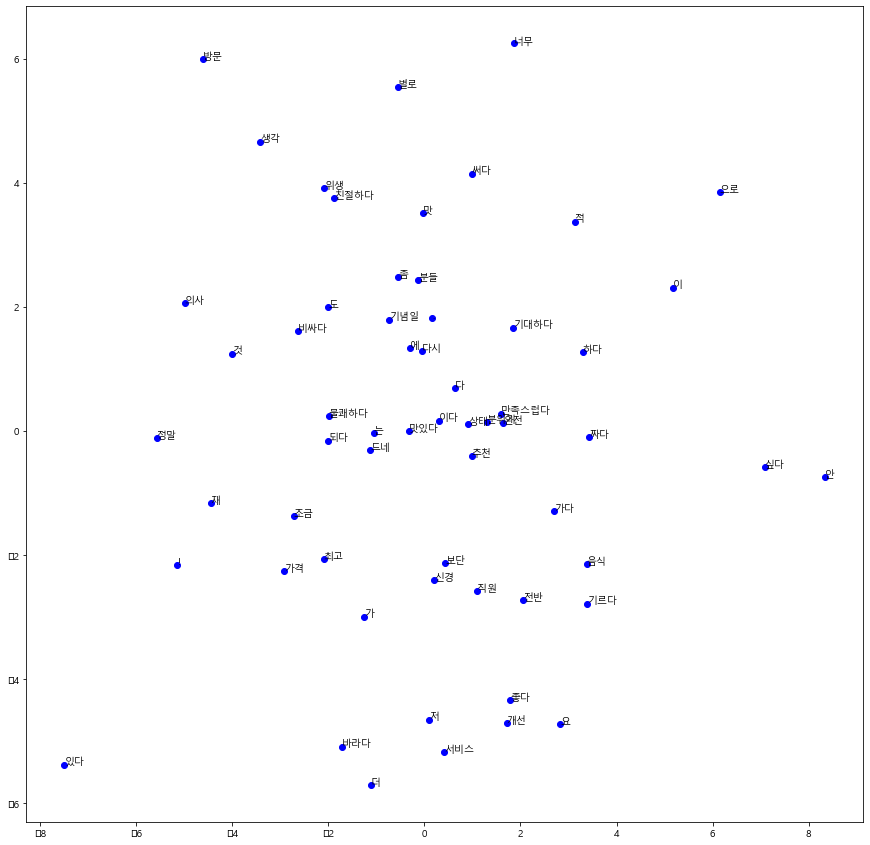

In [28]:
plt.figure(figsize=(15, 15))

for word_id, (x_coordinate, y_coordinate) in enumerate(pc_weight):
    plt.scatter(x_coordinate, y_coordinate, color="blue")
    plt.annotate(i2w[word_id], (x_coordinate, y_coordinate))

#### **CBOW 결과**

In [29]:
pc_weight = pca.fit_transform(cbow.embedding.weight.data.cpu().numpy())

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


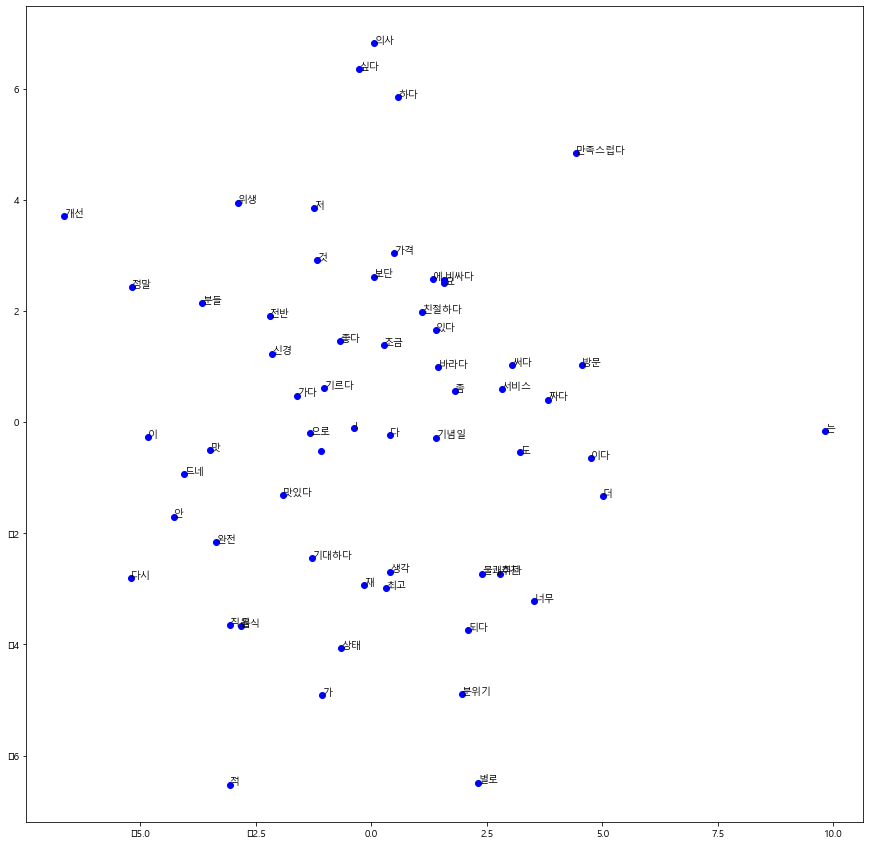

In [30]:
plt.figure(figsize=(15, 15))

for word_id, (x_coordinate, y_coordinate) in enumerate(pc_weight):
    plt.scatter(x_coordinate, y_coordinate, color="blue")
    plt.annotate(i2w[word_id], (x_coordinate, y_coordinate))

# **4. RNNs with Attention**

'3. Deep Learning'에서 배운 Seq2Seq와 Attention에 대해서 간략하게 복습 및 보충하겠습니다. 자세한 건 '3. Deep Learning'을 참고하세요.

## **4.1 Sequence to Sequecne**

![4-4-1](_image/4-4-1.PNG)

위 그림을 보면 알 수 있듯이 시퀀스 투 시퀀스는 입력을 받는 인코더와 출력하는 디코더로  이루어져있습니다. 그리고 인코더와 디코더는 각각의 RNN, LSTM, GRU 중 하나로 구성되어 있습니다. 

문장의 의미를 더욱 정확하게 파악하기 위해서 양방향 RNN을 사용할 수도 있습니다. 문장을 순방향으로 읽는 RNN과 역방향으로 읽는 RNN을 이용해 나온 최종 은닉 상태를 합하여 사용합니다. 이때 디코더는 순방향으로 하나씩 출력해야하므로 디코더에선 양방향을 사용하지 않습니다.

## **4.2 Attention**

Seq2Seq는 큰 문제점을 하나 가지고 있었습니다. 마지막 은닉 상태가 문장의 모든 의미를 함축해야 하는데 문장의 길이가 길어질수록 그것이 불가능하다는 것입니다. 즉, 앞쪽의 의미는 잊어버리게 됩니다. 이를 방지하기 위해 우리는 Attention이란 방법을 도입했었습니다.

간단하게 말하면 인코더에서 구한 은닉 상태의 결과들을 디코더가 필요한 결과들을 위주로 사용하는 방법이었습니다. 예를 들어 곱셈 기반의 attention을 보겠습니다.

![4-4-2](_image/4-4-2.PNG)

먼저 인코더에서 구해진 은닉 상태를 다 저장합니다. 이제 디코더에서 은닉 상태를 거칠 때, 인코더의 은닉 상태들과 내적으로 유사도를 구하여 소프트맥스합니다. 그리고 그 비율을 각각 인코더의 은닉 상태에 곱하여 합한 뒤, 구해진 값을 디코더의 추가 입력값으로 사용합니다.

예를 들어 기계 번역에선 문장에서 나와야 할 품사가 동일할 때 가중치가 더 높게 측정되는 것입니다. 

단어마다 어떤 단어에 가중치가 주어졌는지 그래프로 그려보면 다음과 같습니다. 가로축은 input, 세로축은 output 단어들입니다.

![4-4-3](_image/4-4-3.PNG)

(a)를 보면 중간에 어순이 바뀐 것을 확인할 수 있습니다. 또한 (b)를 보면 어떤 언어에선 하나의 단어가 다른 언어에선 여러 단어로 표현되는 것을 확인할 수 있습니다. 

이 이외도 다른 attention 방법이 있습니다. 예를 들어 concat 기반의 어텐션이 있습니다. 이는 인코더의 각각 은닉 상태들을 디코더의 은닉 상태와 concat하여 fc를 거치게 하고 하나의 노드를 출력으로 받습니다. 모든 인코더의 은닉 상태에게 적용하여 나온 값들을 가중치로 사용하여 적용하는 방법입니다. 

## 실습1. Seq2Seq with Attention

이번 실습은 Seq2Seq 모델을 구현하고 attention 모듈을 추가해보겠습니다.

### **1) Seq2Seq with toy example**

#### **데이터 전처리**

In [1]:
from tqdm import tqdm
from torch import nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.nn import functional as F

import torch
import random

src_data를 trg_data로 바꾸는 번역 task를 수행하기 위한 sample data를 준비합니다.

전체 단어 수는 100개이고 다음과 같이 pad token, start, token, end token의 id도 정의합니다.

In [2]:
vocab_size = 100
pad_id = 0
sos_id = 1 # <sos> : start of sentence
eos_id = 2 # <eos> : end of sentnece

src_data = [
    [3, 77, 56, 26, 3, 55, 12, 36, 31],
    [58, 20, 65, 46, 26, 10, 76, 44],
    [58, 17, 8],
    [59],
    [29, 3, 52, 74, 73, 51, 39, 75, 19],
    [41, 55, 77, 21, 52, 92, 97, 69, 54, 14, 93],
    [39, 47, 96, 68, 55, 16, 90, 45, 89, 84, 19, 22, 32, 99, 5],
    [75, 34, 17, 3, 86, 88],
    [63, 39, 5, 35, 67, 56, 68, 89, 55, 66],
    [12, 40, 69, 39, 49]
]

trg_data = [
    [75, 13, 22, 77, 89, 21, 13, 86, 95],
    [79, 14, 91, 41, 32, 79, 88, 34, 8, 68, 32, 77, 58, 7, 9, 87],
    [85, 8, 50, 30],
    [47, 30],
    [8, 85, 87, 77, 47, 21, 23, 98, 83, 4, 47, 97, 40, 43, 70, 8, 65, 71, 69, 88],
    [32, 37, 31, 77, 38, 93, 45, 74, 47, 54, 31, 18],
    [37, 14, 49, 24, 93, 37, 54, 51, 39, 84],
    [16, 98, 68, 57, 55, 46, 66, 85, 18],
    [20, 70, 14, 6, 58, 90, 30, 17, 91, 18, 90],
    [37, 93, 98, 13, 45, 28, 89, 72, 70]
]

In [3]:
# target data의 각 문장의 시작과 끝에 <sos> token id와 <eos> token id를 추가합니다.
trg_data = [[sos_id] + seq + [eos_id] for seq in tqdm(trg_data)]

100%|██████████| 10/10 [00:00<?, ?it/s]


In [4]:
# 각 문장의 길이를 동일하게 맞춰주기 위해 <pad> token id를 추가하는 padding 함수를 정의합니다.
def padding(data):
    max_len = len(max(data, key=len))
    print(f"Maximum sequence length: {max_len}")
    
    valid_lens = []
    for i, seq in enumerate(tqdm(data)):
        valid_lens.append(len(seq))
        if len(seq) < max_len:
            data[i] = seq + [pad_id] * (max_len - len(seq))
    
    return data, valid_lens, max_len

In [5]:
src_data, src_lens, src_max_len = padding(src_data)
trg_data, trg_lens, trg_max_len = padding(trg_data)

Maximum sequence length: 15


100%|██████████| 10/10 [00:00<?, ?it/s]


Maximum sequence length: 22


100%|██████████| 10/10 [00:00<00:00, 10043.83it/s]


In [6]:
# B: batch size,
# S_L: source maximum sequence length
# T_L: target maximum sequence length

src_batch = torch.LongTensor(src_data) # (B, S_L)
src_batch_lens = torch.LongTensor(src_lens) # (B)
trg_batch = torch.LongTensor(trg_data) # (B, T_L)
trg_batch_lens = torch.LongTensor(trg_lens) # (B)

print(src_batch.shape)
print(src_batch_lens.shape)
print(trg_batch.shape)
print(trg_batch_lens.shape)

torch.Size([10, 15])
torch.Size([10])
torch.Size([10, 22])
torch.Size([10])


In [7]:
src_batch_lens, sorted_idx = src_batch_lens.sort(descending=True)
src_batch = src_batch[sorted_idx]
trg_batch = trg_batch[sorted_idx]
trg_batch_lens = trg_batch_lens[sorted_idx]

print(src_batch)
print(src_batch_lens)
print(trg_batch)
print(trg_batch_lens)

tensor([[39, 47, 96, 68, 55, 16, 90, 45, 89, 84, 19, 22, 32, 99,  5],
        [41, 55, 77, 21, 52, 92, 97, 69, 54, 14, 93,  0,  0,  0,  0],
        [63, 39,  5, 35, 67, 56, 68, 89, 55, 66,  0,  0,  0,  0,  0],
        [ 3, 77, 56, 26,  3, 55, 12, 36, 31,  0,  0,  0,  0,  0,  0],
        [29,  3, 52, 74, 73, 51, 39, 75, 19,  0,  0,  0,  0,  0,  0],
        [58, 20, 65, 46, 26, 10, 76, 44,  0,  0,  0,  0,  0,  0,  0],
        [75, 34, 17,  3, 86, 88,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [12, 40, 69, 39, 49,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [58, 17,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [59,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])
tensor([15, 11, 10,  9,  9,  8,  6,  5,  3,  1])
tensor([[ 1, 37, 14, 49, 24, 93, 37, 54, 51, 39, 84,  2,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 1, 32, 37, 31, 77, 38, 93, 45, 74, 47, 54, 31, 18,  2,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 1, 20, 70, 14,  6, 58, 90,

#### Encoder 구현
- Embedding layer, output layer, GRU cell을 포함한 encoder 모듈을 구현합니다.

In [8]:
embedding_size = 256
hidden_size = 512
num_layers = 2
num_dirs = 2 # 2 if bidirectional=True otherwise 1
dropout = 0.1

In [9]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.gru = nn.GRU(
            input_size=embedding_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            bidirectional=True if num_dirs > 1 else False,
            dropout=dropout,
        )
        self.linear = nn.Linear(num_dirs * hidden_size, hidden_size)
    
    def forward(self, batch, batch_lens): # batch: (B, S_L), batch_lens: (B)
        # d_w: word embedding size
        batch_emb = self.embedding(batch) # (B, S_L, d_w)
        batch_emb = batch_emb.transpose(0, 1) # (S_L, B, d_w)
        
        packed_input = pack_padded_sequence(batch_emb, batch_lens)
        
        h_0 = torch.zeros((num_layers * num_dirs, batch.shape[0], hidden_size)) # (num_dirs*num_layers, B, d_h) = (4, B, d_h)
        packed_outputs, h_n = self.gru(packed_input, h_0) # h_n: (4, B, d_h)
        outputs = pad_packed_sequence(packed_outputs)[0] # outputs: (S_L, B, 2d_h)
        outputs = torch.tanh(self.linear(outputs)) # (S_L, B, d_h)
        
        forward_hidden = h_n[-2, :, :]
        backward_hidden = h_n[-1, :, :]
        hidden = torch.tanh(self.linear(torch.cat((forward_hidden, backward_hidden), dim=-1))).unsqueeze(0) # (1, B, d_h)
        
        return outputs, hidden

In [10]:
encoder = Encoder()

### **2) Dot-product Attention 구현**

attention 중 대표적 형태인 dot-product attention을 구현하겠습니다.

In [11]:
class DotAttention(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, decoder_hidden, encoder_outputs): # (1, B, d_h), (S_L, B, d_h)
        query = decoder_hidden.squeeze(0) # (B, d_h)
        key = encoder_outputs.transpose(0, 1) # (B, S_L, d_h)
        
        energy = torch.sum(torch.mul(key, query.unsqueeze(1)), dim=-1) # (B, S_L)
        
        attn_scores = F.softmax(energy, dim=-1) # (B, S_L)
        attn_values = torch.sum(torch.mul(encoder_outputs.transpose(0, 1), attn_scores.unsqueeze(2)), dim=1) # (B, d_h)
        
        return attn_values, attn_scores

In [12]:
dot_attn = DotAttention()

이제 attention 모듈을 가지는 decoder 클래스를 구현하겠습니다.

In [13]:
class Decoder(nn.Module):
    def __init__(self, attention):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.attention = attention
        self.rnn = nn.GRU(
            embedding_size,
            hidden_size,
        )
        self.output_linear = nn.Linear(2 * hidden_size, vocab_size)
    
    def forward(self, batch, encoder_outputs, hidden):
        """
        Args:
            batch : (B)
            encoder_outputs: (L, B, d_h)
            hidden: (1, B, d_h)
        """
        batch_emb = self.embedding(batch) # (B, d_w)
        batch_emb = batch_emb.unsqueeze(0) # (1, B, d_w)
        
        outputs, hidden = self.rnn(batch_emb, hidden) # (1, B, d_h), (1, B, d_h)
        attn_values, attn_scores = self.attention(hidden, encoder_outputs) # (B, d_h), (B, S_L)
        concat_outputs = torch.cat((outputs, attn_values.unsqueeze(0)), dim=-1) # (1, B, 2d_h)
        
        return self.output_linear(concat_outputs).squeeze(0), hidden # (B, V), (1, B, d_h)

In [14]:
decoder = Decoder(dot_attn)

### **3) Seq2Seq 모델 구축**

In [15]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, src_batch, src_batch_lens, trg_batch, teacher_forcing_prob=0.5):
        # src_batch: (B, S_L), src_batch_lens: (B), trg_batch: (B, T_L)
        
        # encoder_outputs: (S_L, B, d_h), hidden: (1, B, d_h)
        encoder_outputs, hidden = self.encoder(src_batch, src_batch_lens) 
        
        input_ids = trg_batch[:, 0] # (B)
        batch_size = src_batch.shape[0]
        outputs = torch.zeros(trg_max_len, batch_size, vocab_size) # (T_L, B, V)
        
        for t in range(1, trg_max_len):
            # decoder_outputs: (B, V), hidden: (1, B, d_h)
            decoder_outputs, hidden = self.decoder(input_ids, encoder_outputs, hidden)
            
            outputs[t] = decoder_outputs
            _, top_ids = torch.max(decoder_outputs, dim=-1) # top_ids: (B)
            
            input_ids = trg_batch[:, t] if random.random() > teacher_forcing_prob else top_ids
        
        return outputs

In [16]:
seq2seq = Seq2Seq(encoder, decoder)

### **4) 모델 사용하기**

In [17]:
# V: vocab size
outputs = seq2seq(src_batch, src_batch_lens, trg_batch) # (T_L, B, V)
print(outputs)
print(outputs.shape)

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-0.0113, -0.0776,  0.0139,  ...,  0.0056, -0.0097, -0.0801],
         [-0.0295, -0.0791,  0.0305,  ..., -0.0422, -0.0008, -0.0755],
         [-0.0770, -0.1050,  0.0398,  ..., -0.0124, -0.0159, -0.0521],
         ...,
         [-0.0363, -0.0961,  0.0102,  ..., -0.0386, -0.0404, -0.0805],
         [-0.0198, -0.1032,  0.0158,  ..., -0.0103, -0.0457, -0.0972],
         [-0.0141, -0.1064,  0.0251,  ..., -0.0305, -0.0023, -0.0846]],

        [[ 0.0427, -0.0626,  0.0652,  ..., -0.0445, -0.1404, -0.0828],
         [-0.0090,  0.0018,  0.0606,  ..., -0

In [18]:
sample_sent = [4, 10, 88, 46, 72, 34, 14, 51]
sample_len = len(sample_sent)

sample_batch = torch.LongTensor(sample_sent).unsqueeze(0) # (1, L)
sample_batch_len = torch.LongTensor([sample_len]) # (1)

encoder_output, hidden = seq2seq.encoder(sample_batch, sample_batch_len) # hidden: (4, 1, d_h)

In [19]:
input_id = torch.LongTensor([sos_id]) # (1)
output = []

for t in range(1, trg_max_len):
    # decoder_output: (1, V), hidden: (4, 1, d_h)
    decoder_output, hidden = seq2seq.decoder(input_id, encoder_output, hidden)
    
    _, top_id = torch.max(decoder_output, dim=-1) # top_ids: (1)
    
    if top_id == eos_id:
        break
    else:
        output += top_id.tolist()
        input_id = top_id

In [20]:
output

[32,
 23,
 7,
 10,
 83,
 83,
 59,
 47,
 67,
 18,
 40,
 40,
 88,
 59,
 40,
 62,
 40,
 59,
 92,
 92,
 18]

### **4) Concat Attention 구현**

Bahdanau Attention이라고도 불리는 Concat Attention을 구현해보겠습니다.
- self.w: concat한 query와 key 벡터를 1차적으로 linear transformation.
- self.v: attention logit 값을 계산.

In [21]:
class ConcatAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Linear(2 * hidden_size, hidden_size, bias=False)
        self.v = nn.Linear(hidden_size, 1, bias=False)
    
    def forward(self, decoder_hidden, encoder_outputs): # (1, B, d_h), (S_L, B, d_h)
        src_max_len = encoder_outputs.shape[0]
        
        decoder_hidden = decoder_hidden.transpose(0, 1).repeat(1, src_max_len, 1) # (B, S_L, d_h)
        encoder_outputs = encoder_outputs.transpose(0, 1) # (B, S_L, d_h)
        
        concat_hiddens = torch.cat((decoder_hidden, encoder_outputs), dim=2) # (B, S_L, 2d_h)
        energy = torch.tanh(self.w(concat_hiddens)) # (B, S_L, d_h)
        
        attn_scores = F.softmax(self.v(energy), dim=1) # (B, S_L, 1)
        attn_values = torch.sum(torch.mul(encoder_outputs, attn_scores), dim=1) # (B, d_h)
        
        return attn_values, attn_scores

In [22]:
concat_attn = ConcatAttention()

In [23]:
class Decoder(nn.Module):
    def __init__(self, attention):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.attention = attention
        self.rnn = nn.GRU(
            embedding_size + hidden_size,
            hidden_size,
        )
        self.output_linear = nn.Linear(hidden_size, vocab_size)
    
    def forward(self, batch, encoder_outputs, hidden): 
        # batch: (B), encoder_outputs: (S_L, B, d_h), hidden: (1, B, d_h)
        batch_emb = self.embedding(batch) # (B, d_w)
        batch_emb = batch_emb.unsqueeze(0) # (1, B, d_w)
        
        attn_values, attn_scores = self.attention(hidden, encoder_outputs) # (B, d_h), (B, S_L)
        concat_emb = torch.cat((batch_emb, attn_values.unsqueeze(0)), dim=-1) # (1, B, d_w + d_h)
        outputs, hidden = self.rnn(concat_emb) # (1, B, d_h), (1, B, d_h)
        
        return self.output_linear(outputs).squeeze(0), hidden # (B, V), (1, B, d_h)

In [24]:
decoder = Decoder(concat_attn)
seq2seq = Seq2Seq(encoder, decoder)

In [25]:
outputs = seq2seq(src_batch, src_batch_lens, trg_batch)
print(outputs)
print(outputs.shape)

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[-1.9526e-02,  1.1674e-01,  1.6659e-01,  ..., -2.2380e-02,
          -9.3701e-02,  6.6963e-02],
         [-1.3735e-02,  1.1081e-01,  1.6176e-01,  ..., -1.6449e-02,
          -9.6613e-02,  7.5349e-02],
         [-1.5554e-02,  1.1270e-01,  1.6276e-01,  ..., -2.8512e-02,
          -9.9880e-02,  7.8048e-02],
         ...,
         [-1.8401e-02,  1